# Machine Learning CIA 2 Project
## Name: Lakshit Gupta
## UIDNO: 229020    Roll No.: 17

# 1. Dataset size = 32950 rows and 15 columns

# 2. Domain Selected: Banking And Finance

# 3. Domain Prerequisite Learning:
###     A fixed deposit (FD), also known as a term deposit, is a type of savings account offered by banks and financial institutions where the customer deposits a specific amount of money for a fixed period of time, usually ranging from a few months to several years. In return for depositing the money, the bank pays a fixed interest rate on the deposited amount, which is typically higher than the interest rate offered on a regular savings account.

###    The interest rate offered on a fixed deposit varies depending on the amount deposited, the length of the deposit term, and the policies of the bank or financial institution. Some banks also offer flexible fixed deposit options that allow customers to withdraw their money before the end of the deposit term, but with a penalty fee.

###     Fixed deposits are considered a low-risk investment option, as the deposited amount and the interest earned are guaranteed by the bank, and the interest rate is fixed for the entire duration of the deposit term. They are popular among risk-averse investors who are looking for a safe and reliable way to earn a predictable return on their savings.

### According to normal study and observation acoording to me the people who mostly make a term deposit are one or all of the following:

#### 1. Retirees and senior citizens: People who are retired or approaching retirement age often prefer FDs as a safe and reliable investment option that can provide a regular stream of income.

#### 2. Conservative investors: Individuals who are risk-averse and prefer stable returns over high-risk investments often choose FDs. They value the guaranteed returns, low risk, and capital protection that FDs offer.

#### 3. Small and mid-sized investors: FDs are accessible to investors of all sizes and can be started with a relatively low investment amount, making them an attractive option for small and mid-sized investors.

#### 4.Those saving for short-term goals: People who are saving for a specific goal, such as a down payment on a house or a child's education, often choose FDs as a way to grow their savings while keeping their funds easily accessible.

# 4. Data set Information:
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## About Each Feature:
1. age: age of the person
2. job: type of job of person
3. marital: marital status
4. education: education of the person
5. default: has credit been in default
6. housing: has housing loan
7. loan: has personal loan?
8. contact: contact communication type
9. month: last contact month
10. day_of_week: last contact day of the week
11. duration: duration of the contact
12. campaign: number of contacts perfomred during the campaign
13. pdays: number of days after last contact was made.
14. previous: number of contacts made previous to this campaign
15. poutcome: outcome of previous marketing campaign

## About Target Attribute:
1. y: has the client subscribed a term deposit?

## Importing Necessary Libraries/Modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Ignoring Warnings for Clean Notebook
import warnings
warnings.filterwarnings("ignore")
#sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# increase recall library
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
# dashboard library
import sweetviz as sv

## Reading the data

In [2]:
# link = 'https://raw.githubusercontent.com/Lakshit11/Data-for-ML-proj/main/data.csv'
# df = pd.read_csv(link,header = 0)
df = pd.read_csv('data.csv',header = 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


### Checking the dimensions of the given dataset:

In [3]:
print(f"The given dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The given dataset has 32950 rows and 16 columns.


# 5. Visualizations

### Statistical Dashboard:

                                             |                                             | [  0%]   00:00 ->…


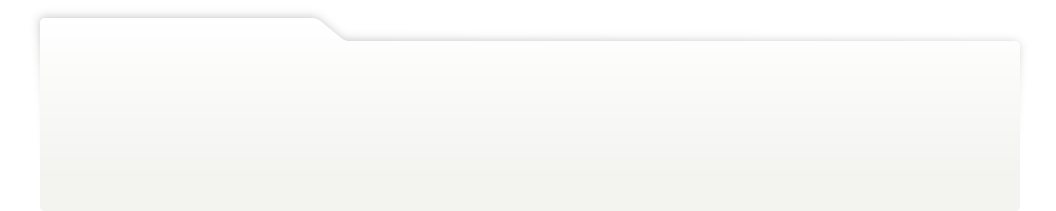
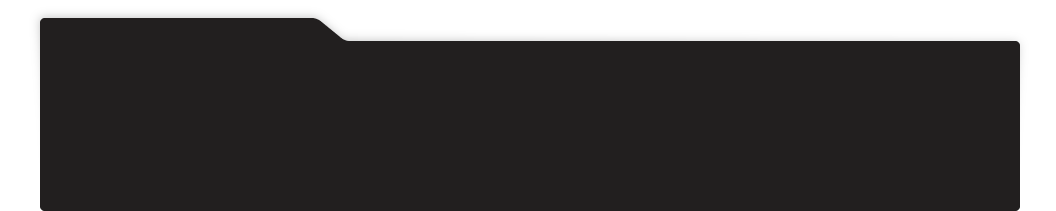
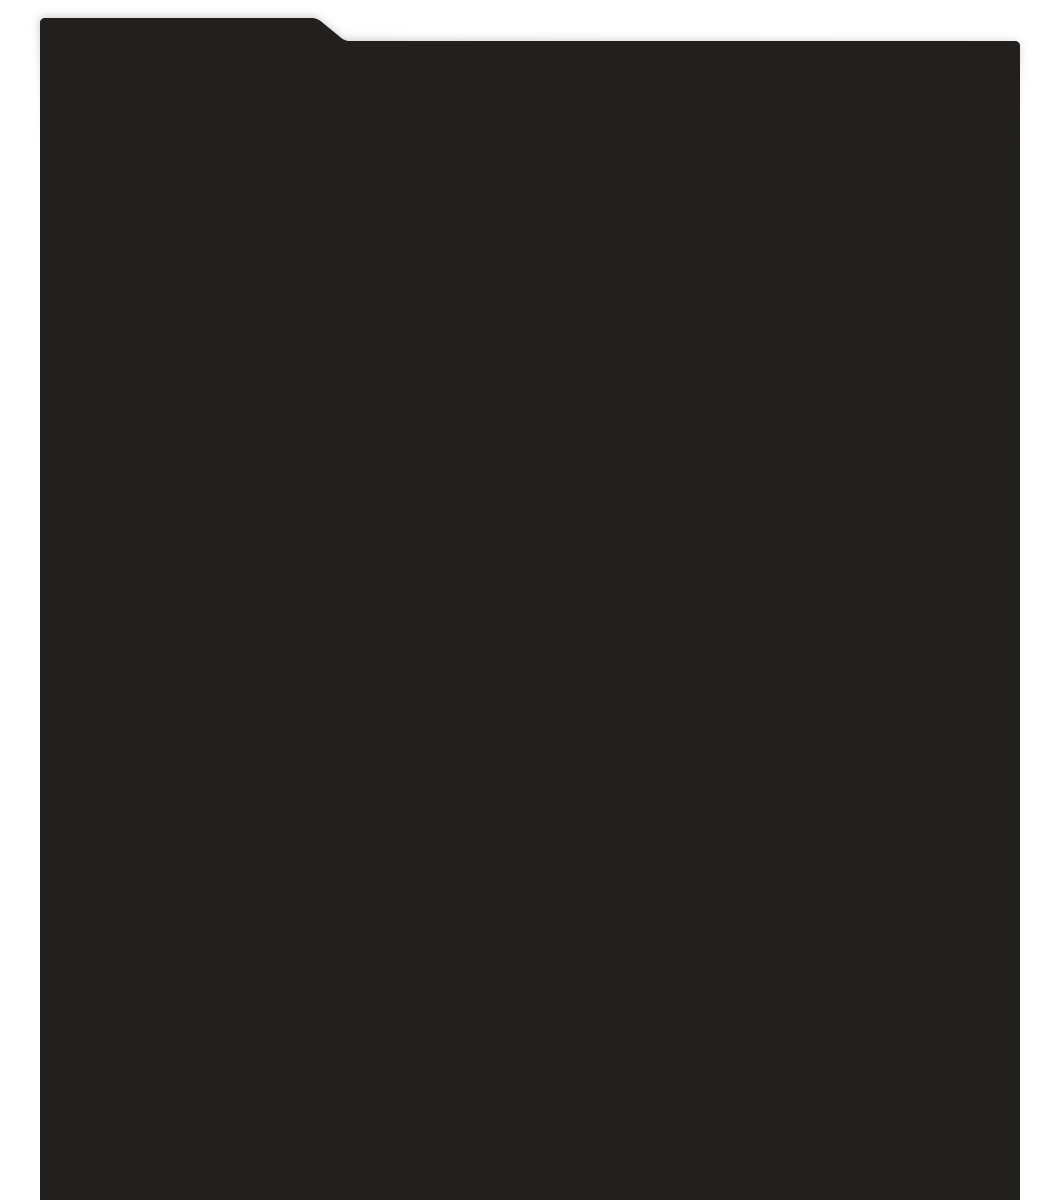
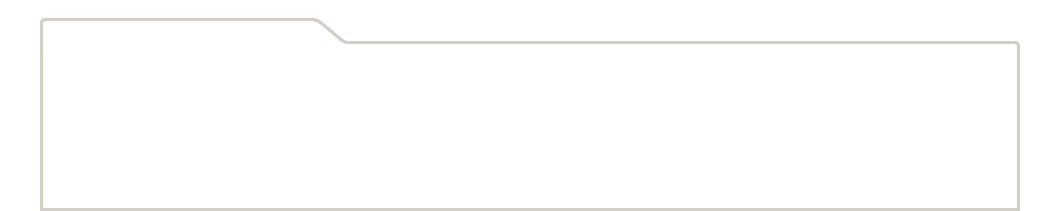
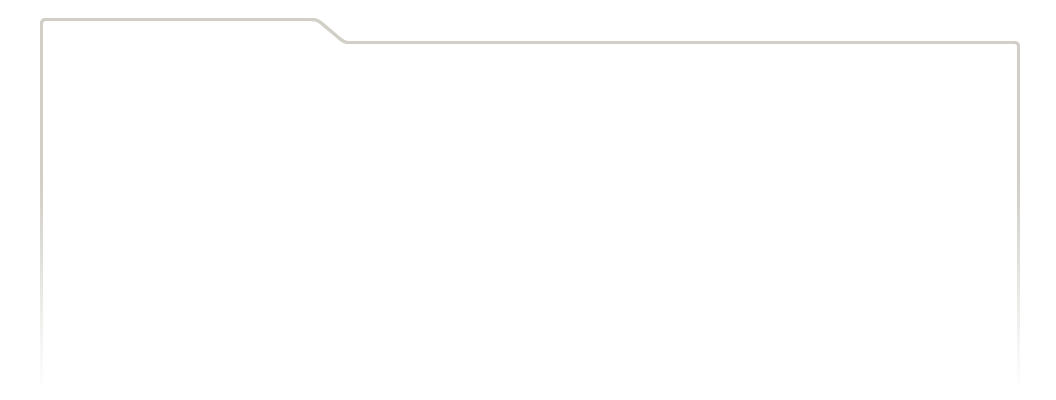
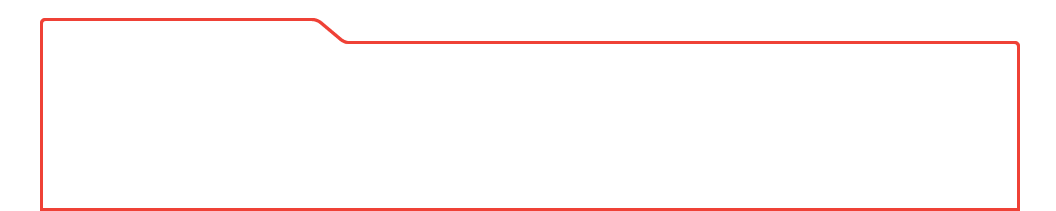
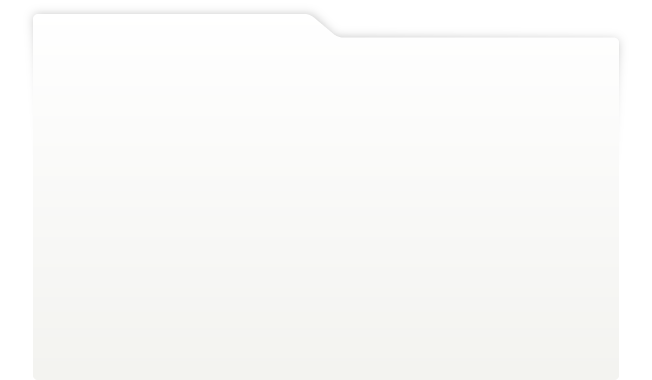
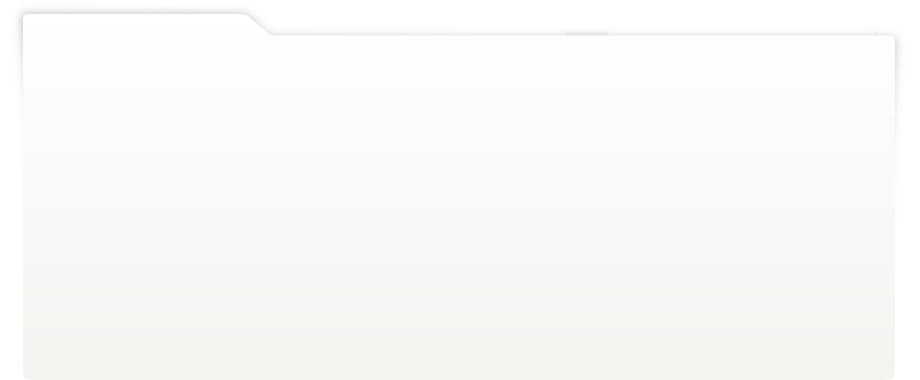
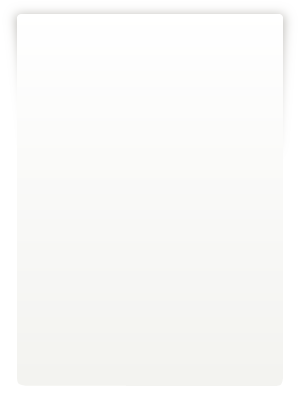
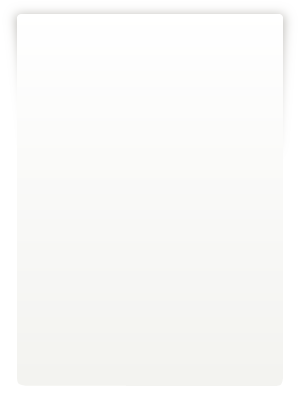
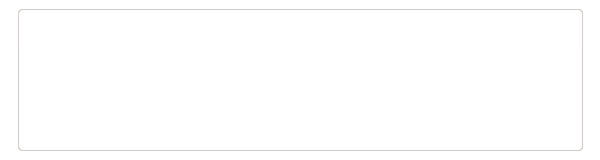
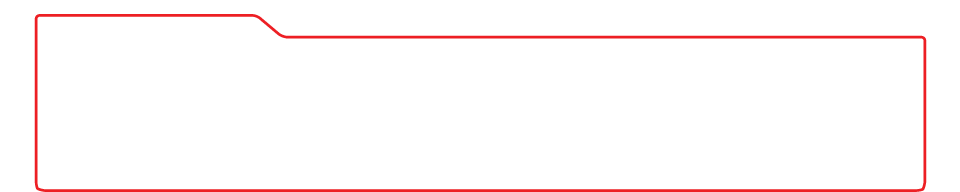
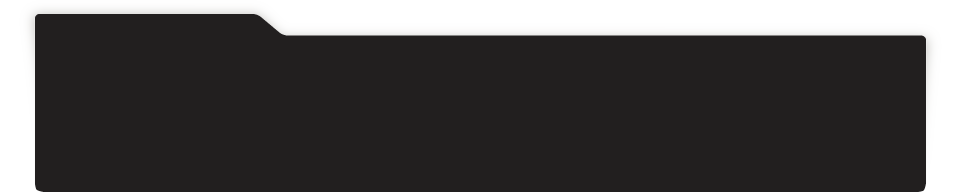
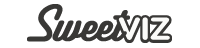
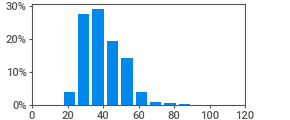
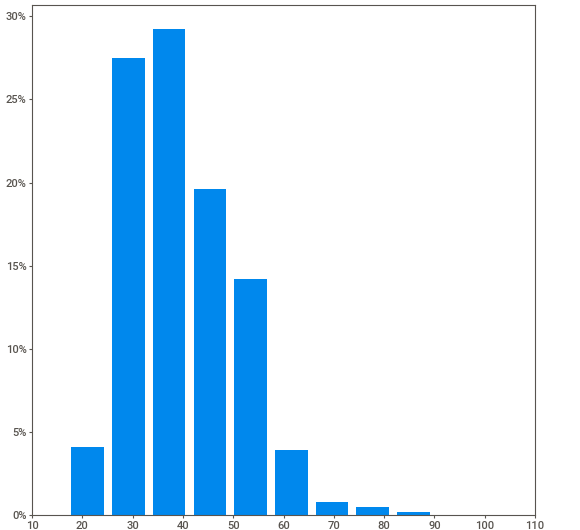
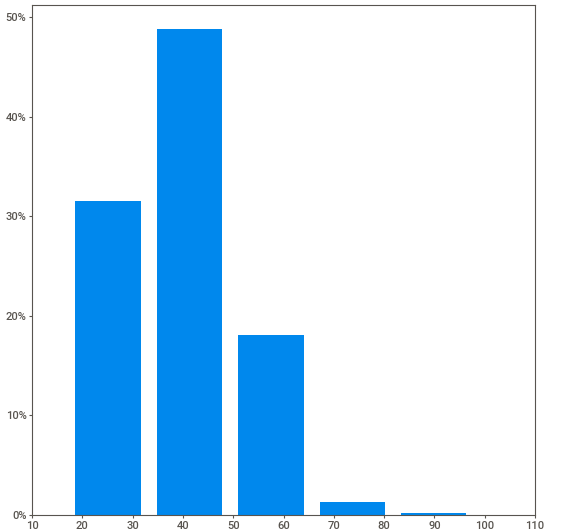
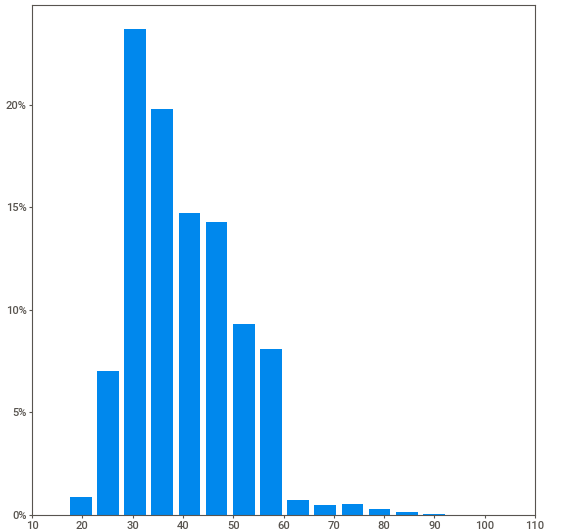
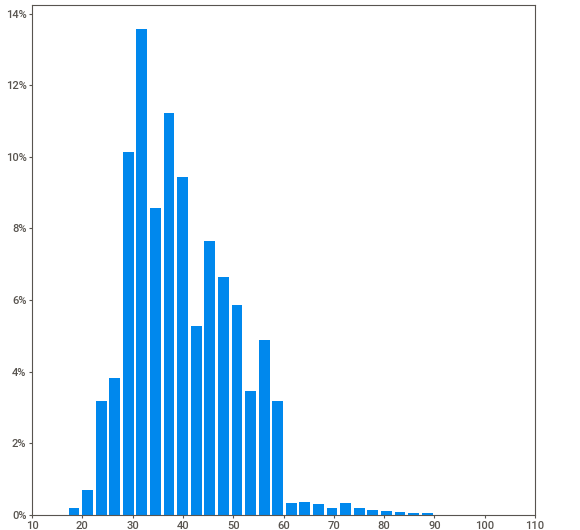
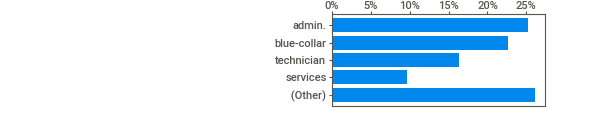
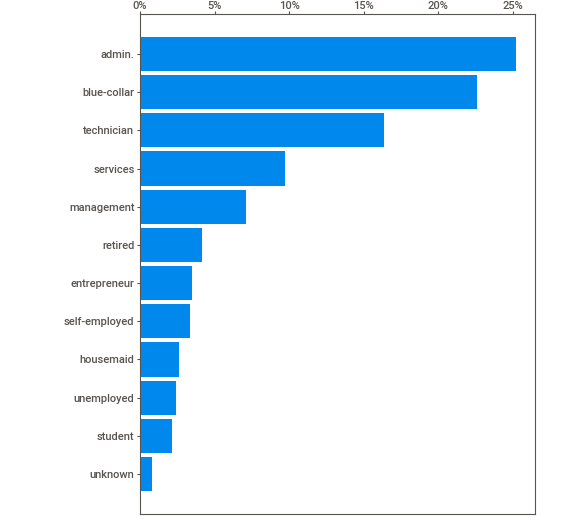
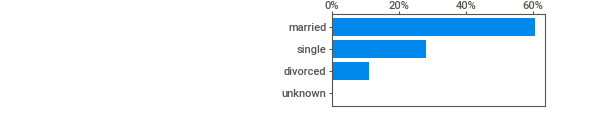
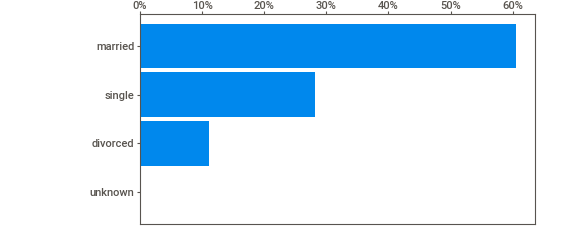
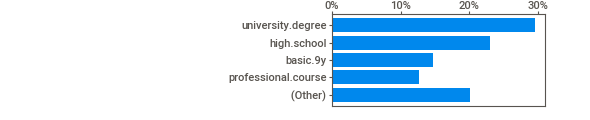
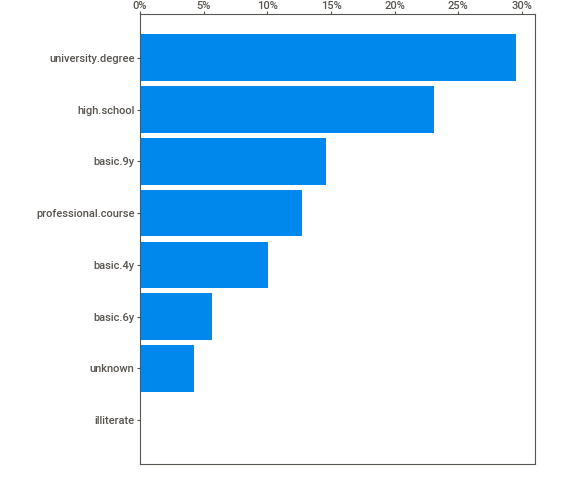
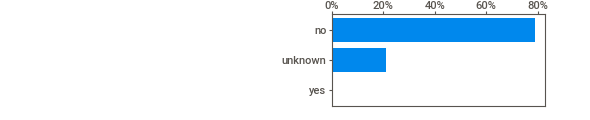
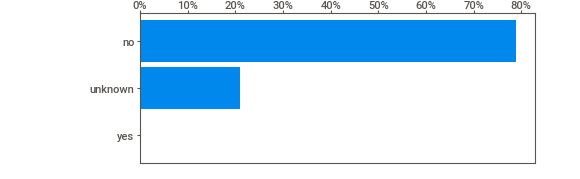
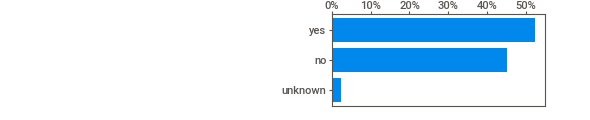
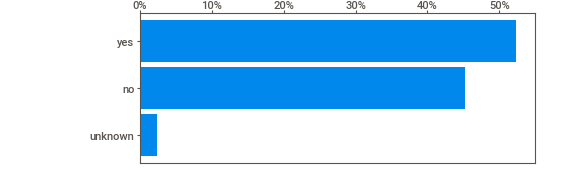
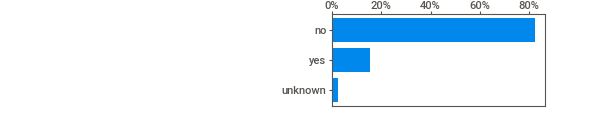
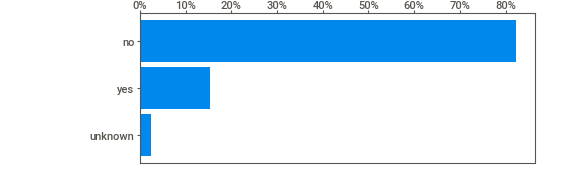
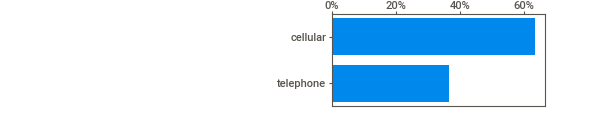
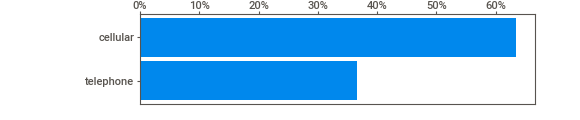
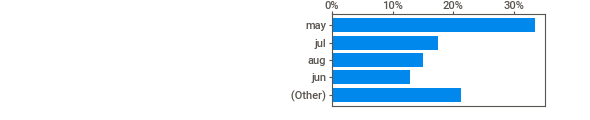
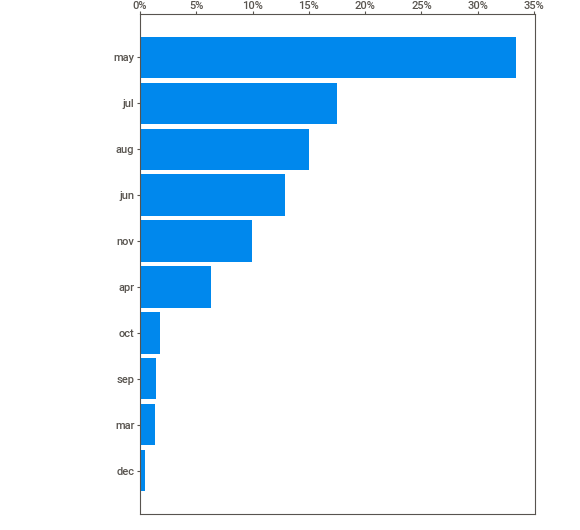
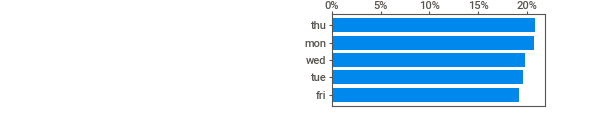
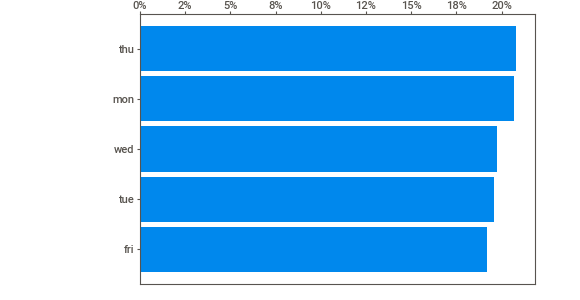
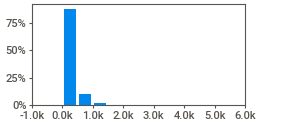
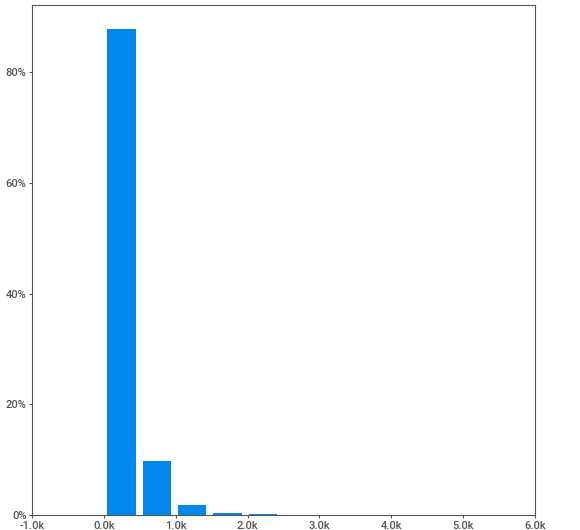
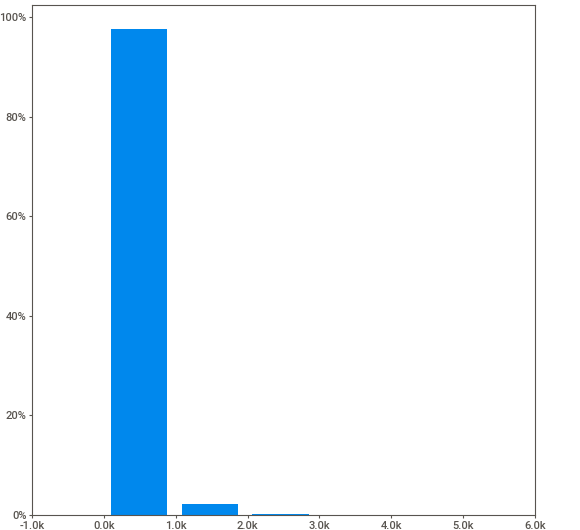
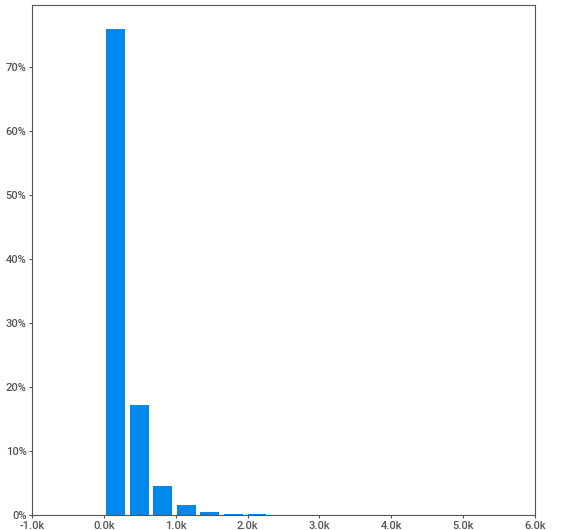
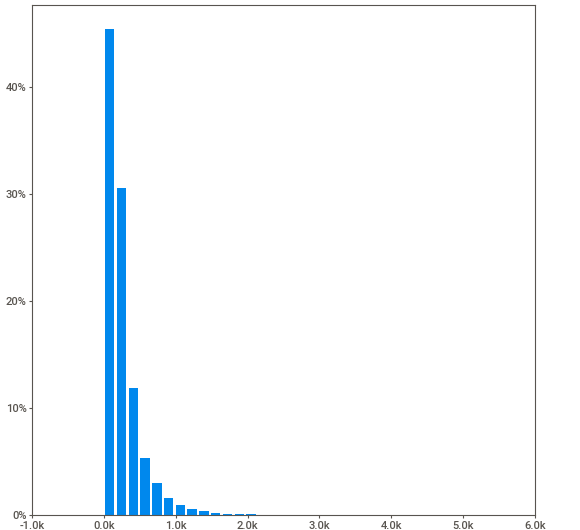
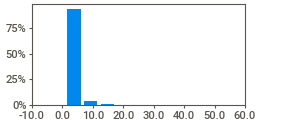
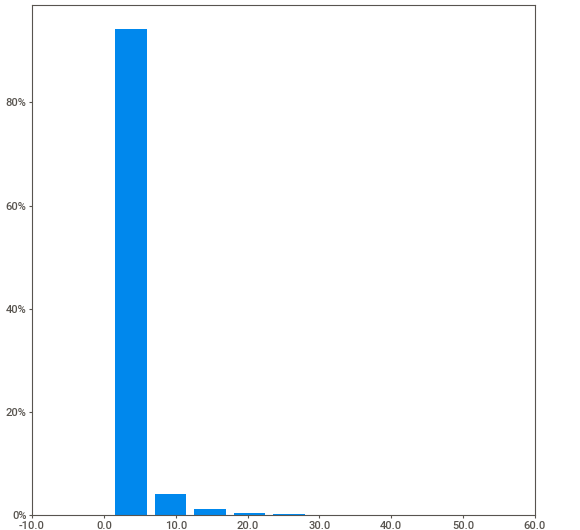
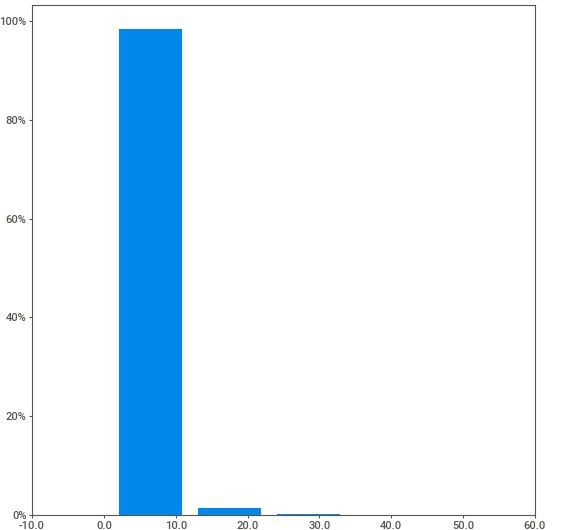
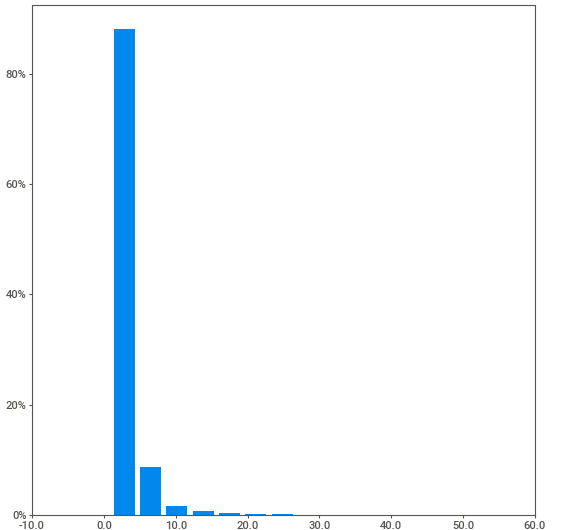
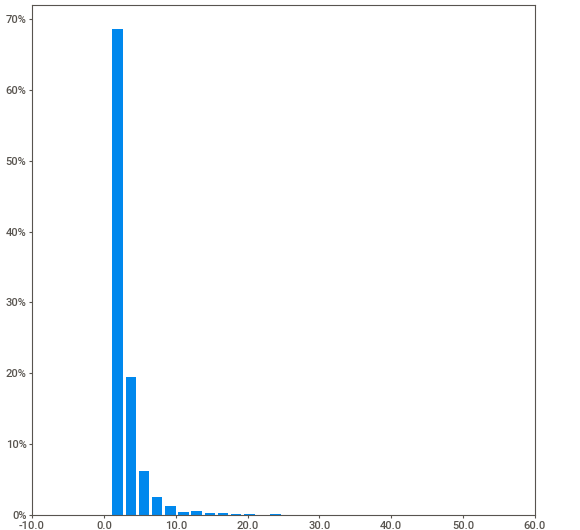
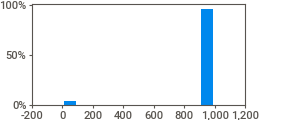
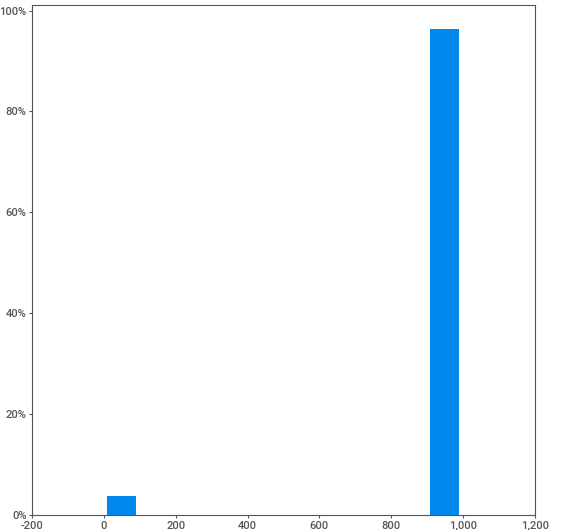
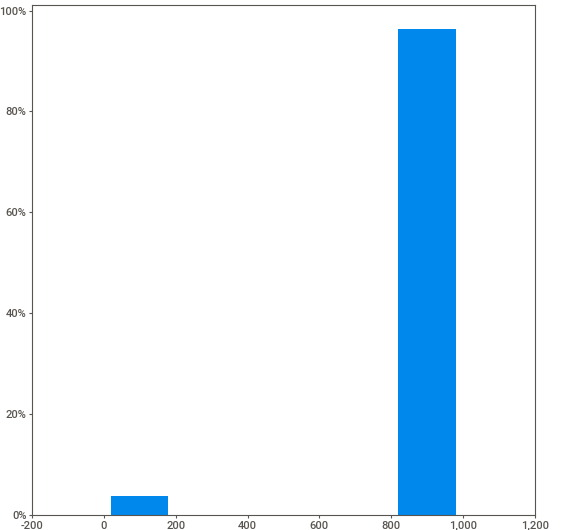
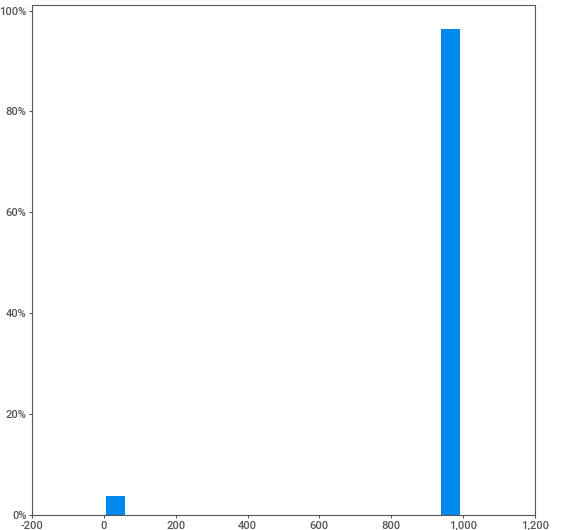
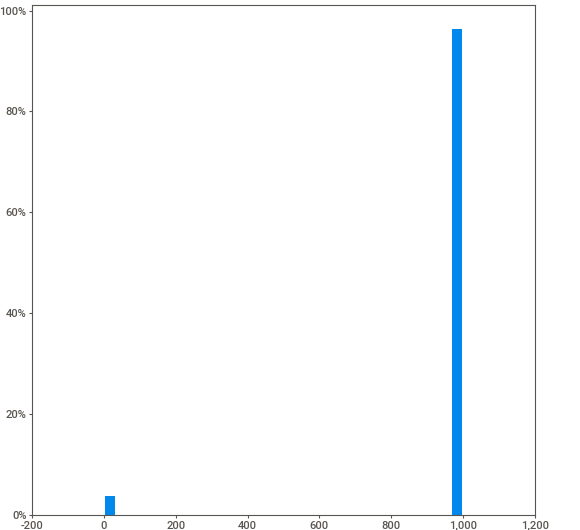
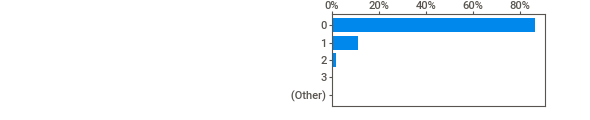
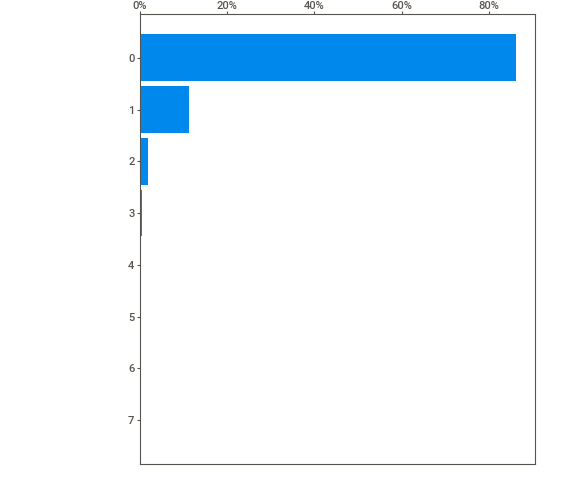
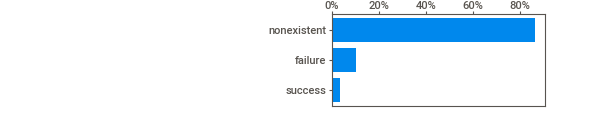
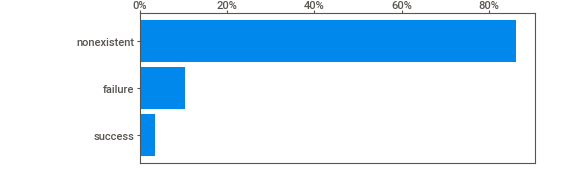
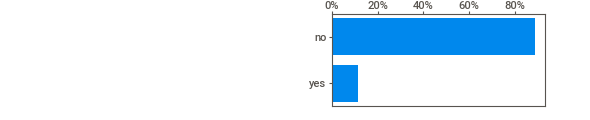
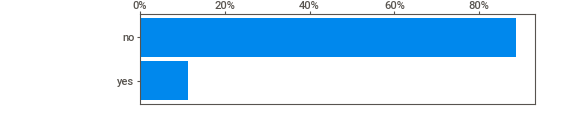
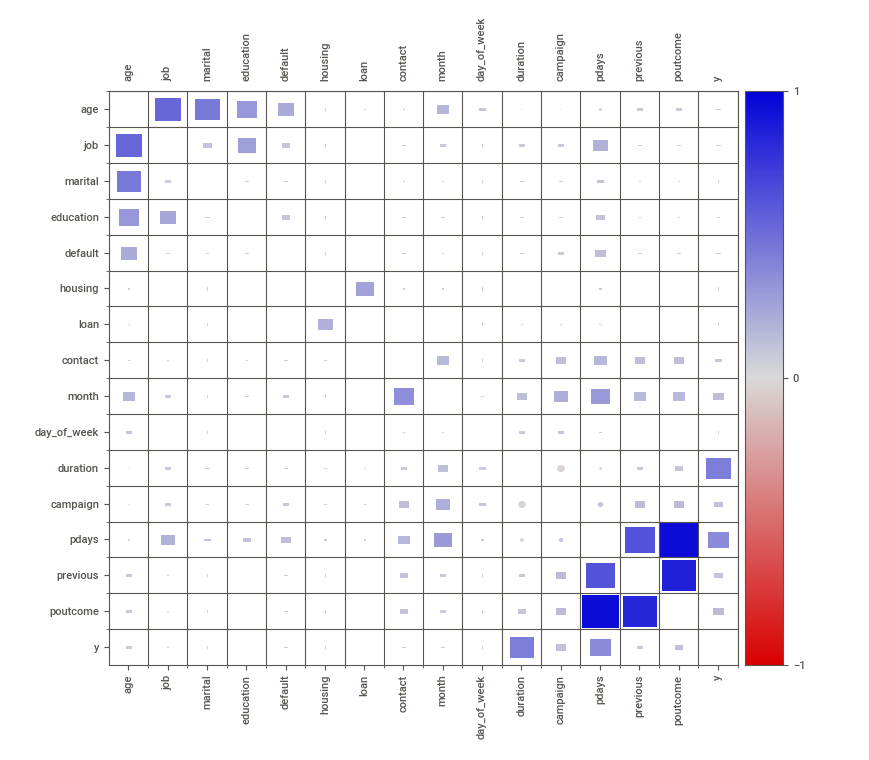
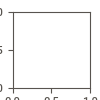

In [4]:
#Note: We need to run this cell to view the dashboard with the data.csv submitted with notebook.
rep = sv.analyze(df)
rep.show_notebook()

### When we click on "Associations" Button on above dashboard, we get a heatmap that shows correlation of each variable or feature with each other feature.

### Also the basic summary of data is given just beside the Associations Button specifying the total number of rows, total duplicates, total number of categorical attributes and total number of numerical attributes,etc.

### The above dashboard consists of all the necessary analysis requirements based on each variable. We just need to click on that particular variable card and all necessary inferences will appear such as distribution, correlation, measures of dispersion and measures of central tendancy, variables that are contributing more for that particular feature, etc.

## Other Inferential Visualizations:

### 1. Total number of yes and no for term deposit:

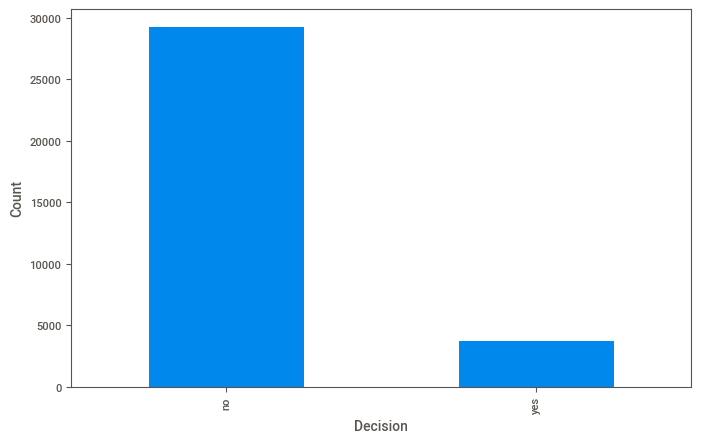

no     29238
yes     3712
Name: y, dtype: int64


In [5]:
plt.figure(figsize=(8,5))
df['y'].value_counts().plot(kind = 'bar',xlabel = 'Decision',ylabel = 'Count')
plt.show()
print(df['y'].value_counts())

### Ans: The total number of no are 29238 which is more than the total number of yes i.e 3712
###          Hence, just the probability of making a term deposit based on given data is 11.26%

### 2. Top 3 jobs in the data:

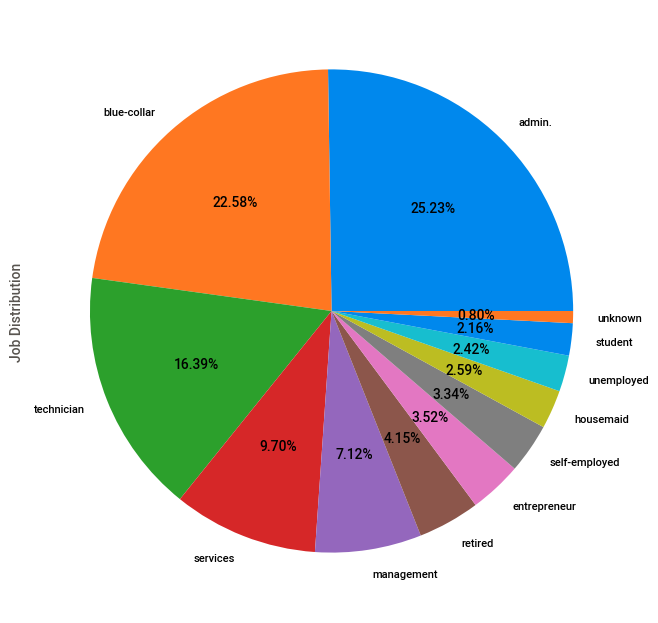

In [6]:
plt.figure(figsize = (12,8))
df['job'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',label = 'Job Distribution')
plt.show()

### Ans: The maximum number of records in the dataset are of job admin with 25.23%. The second is blue-collar job wiht 22.58% and third is technician with 16.39% of data.

### 3. Top 5 educations in the data:

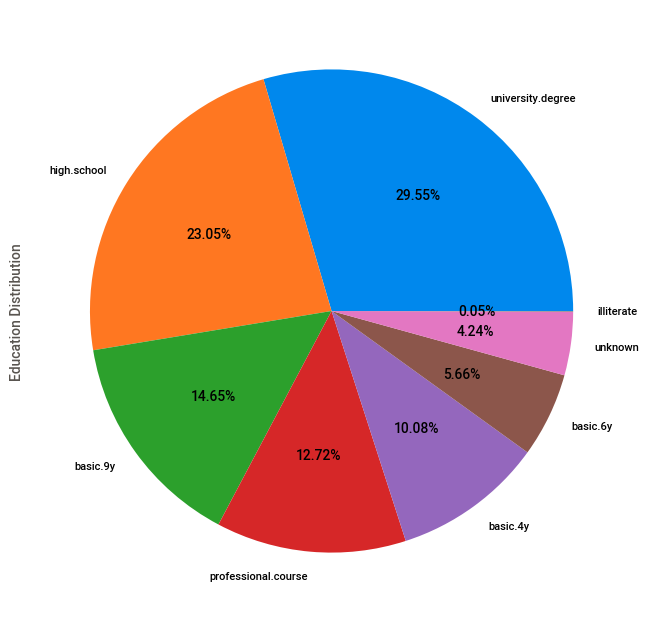

In [7]:
plt.figure(figsize=(12,8))
df['education'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',label = 'Education Distribution')
plt.show()

## Ans: First most pursued education is university degree with 29.55% of data then second is high school with 23.05% data and then third is basic.9y with 14.65%, fourth is professional course with 12.72% and the fifth is basic.4y with 10.08% of the data.

### 4. Distribution of Marital Status:

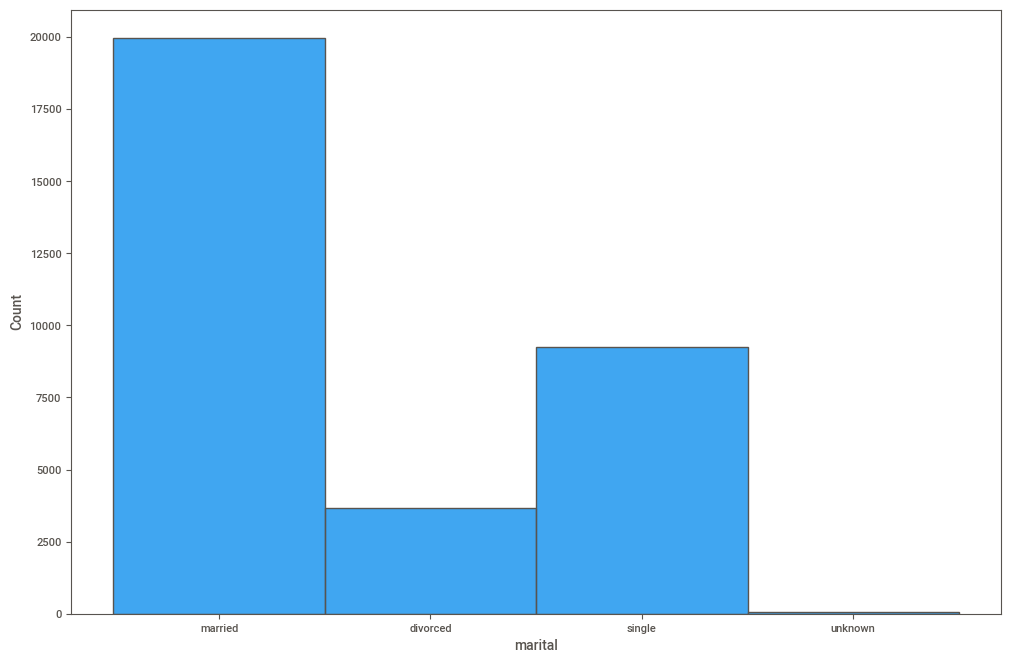

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64


In [8]:
plt.figure(figsize=(12,8))
sns.histplot(x = 'marital',data = df)
plt.show()
print(df['marital'].value_counts())

## Ans: As we can see, most of individuals in the data are married, then second highest is single then comes divorced and finally unknown is of least numbers.

### 5. Distribution of defaulters present in the data:

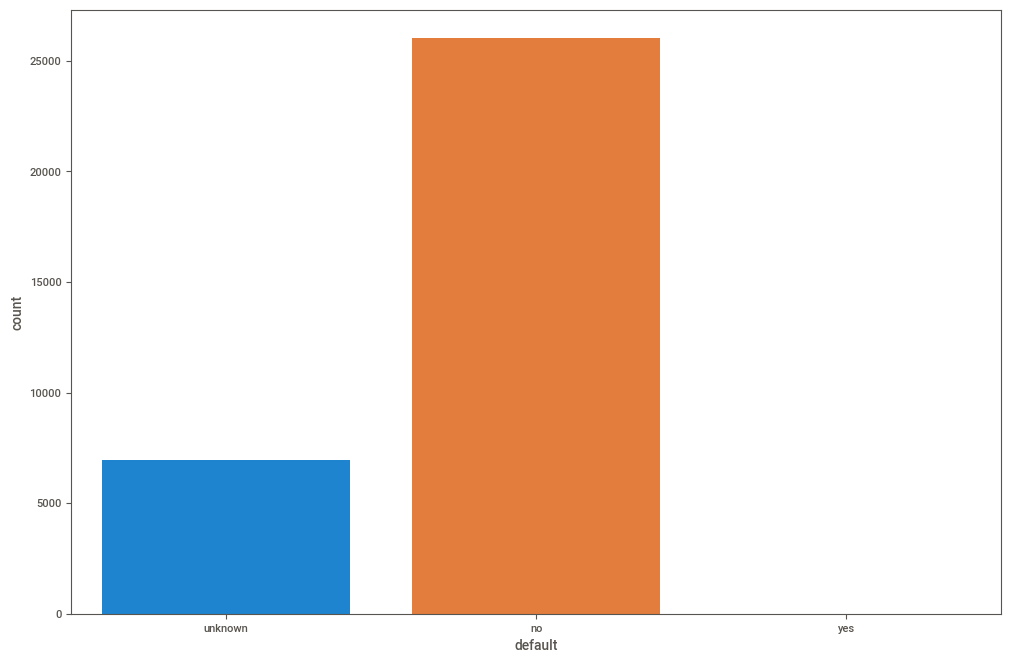

no         26007
unknown     6940
yes            3
Name: default, dtype: int64


In [9]:
plt.figure(figsize = (12,8))
sns.countplot(x='default',data=df)
plt.show()
print(df['default'].value_counts())

## Ans: The number of defaulters in the data are extremely low and most of the individuals are not defaulter but still there are significant number of records whose defaulter status is unknown. This might affect the recall of the model that will be built later in this notebook.

### 6. Will Individual make a term deposit based on job?

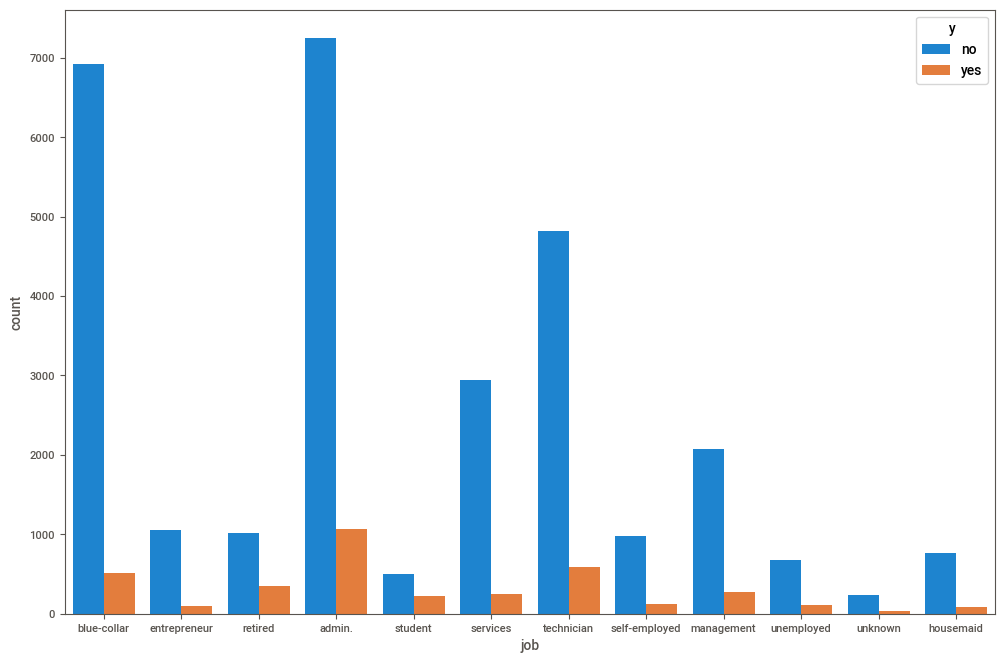

In [10]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'job',data = df, hue = 'y')
plt.show()

## Ans: Based on the above results, the job admin have more ratio of making a term deposit as compared to other jobs. So the answer to the question could be there are slightly more chances that an admin will make more term deposits as compared to other jobs.
## Also, from above plot we come to know that entreprenuers tend to make less term deposits. Talking of Blue-collar category most of them don't tend to make a term deposit but still there is significant number of people that do make a term deposit.

### 7. Will a person having loan make a term deposit?

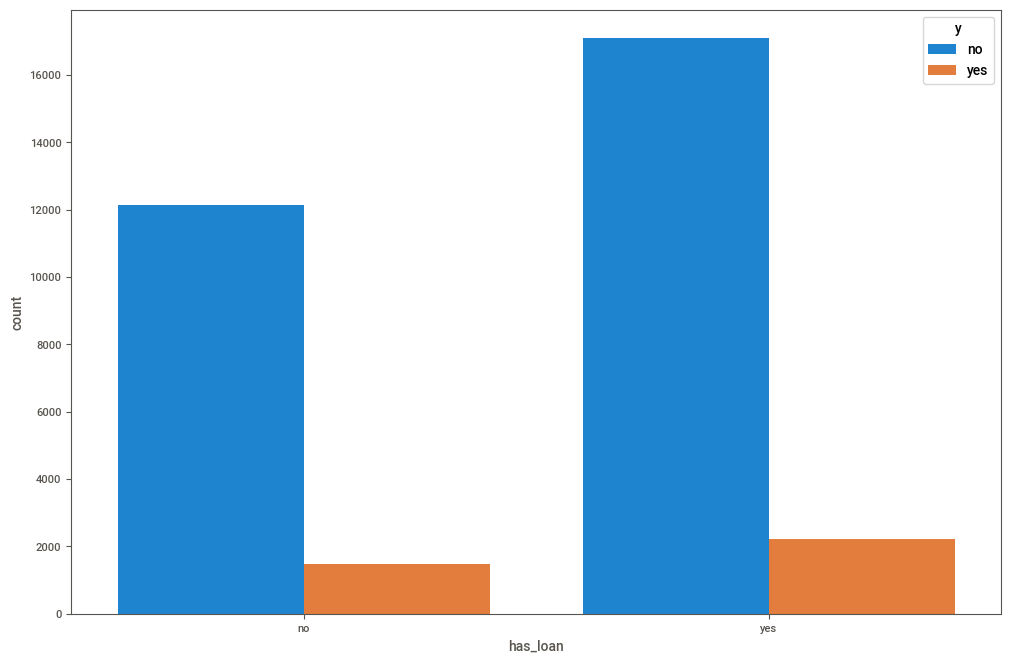

has_loan  y  
yes       no     17086
no        no     12152
yes       yes     2221
no        yes     1491
dtype: int64


In [11]:
loan_df = df
for i,data in df.iterrows():
    if (data['loan'] == 'yes') or (data['housing']=='yes'):
        loan_df.at[i,'has_loan'] = 'yes'
    else:
        loan_df.at[i,'has_loan'] = 'no'
plt.figure(figsize = (12,8))
sns.countplot(x = 'has_loan',hue = 'y',data = loan_df)
plt.show()
print(loan_df[['has_loan','y']].value_counts())

## Ans: Above plot helps us to see that people having loans tend to make more term deposits as compared to ones who don't have loans. The reason might be people with home loan may want to be safe by not risking spending their money.

## From above result we can see that around 19000 people have loan and from that 2221 would opt for a term deposit. On the other hand, thre are 13500 people who do not have loan and from that 1491 would opt for term deposit.

## From above statement we could say that there is around 12% probability based on given dataset that an indidual will make a term deposit disregarding other redundant information.

# 6. Preprocessing

### a) Handling null values:

In [12]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
has_loan       0
dtype: int64

As we can see there are no null values in the given dataset so we can proceed ahead safely.

### b) Handling Outliers:

age :


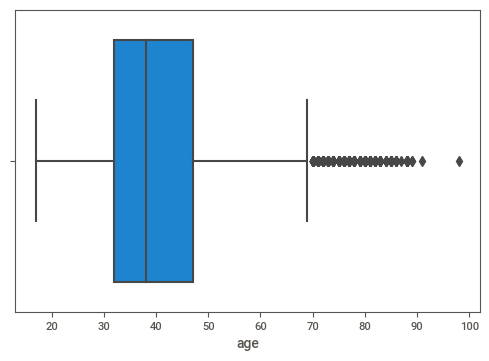

duration :


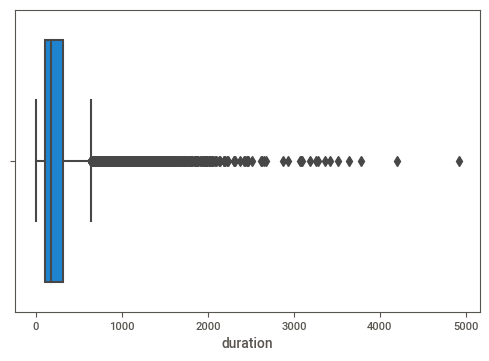

campaign :


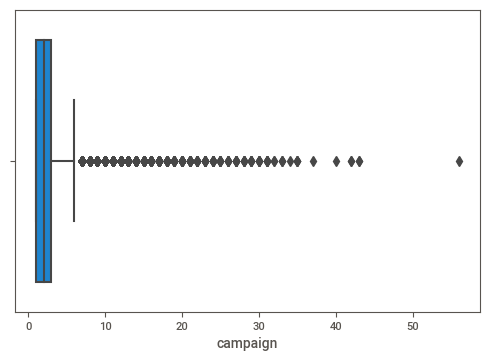

pdays :


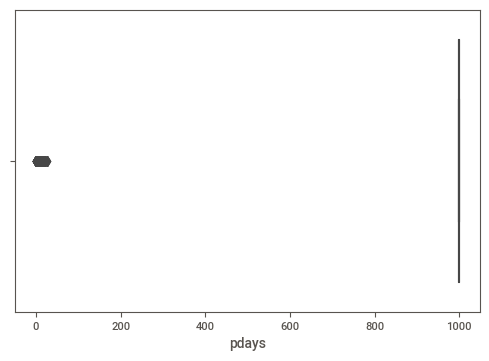

previous :


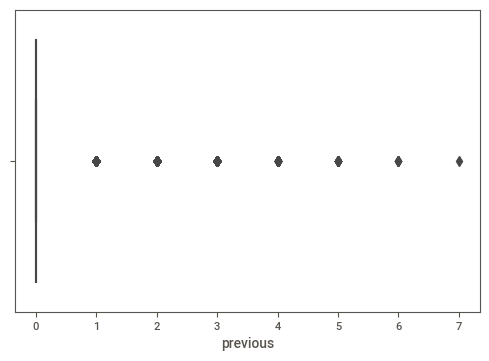

In [13]:
for i in df.columns.values:
    if df[i].dtype != 'object':
        print(i,":")
        sns.boxplot(x = i, data = df)
        plt.show()

As we can see there are outliers in age, duration and campaign variables of the dataset so we have to deal with it

In [14]:
cols = ['age','duration','campaign']
def outlier_treatment(df):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5*iqr)
        upper = q3 + (1.5*iqr)
        for i,data in df.iterrows():
            if data[col]>upper:
                df.at[i,col] = upper
            elif data[col]<lower:
                df.at[i,col] = lower
    return df

In [15]:
df = outlier_treatment(df)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,has_loan
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no,no
2,69,retired,married,basic.4y,no,no,no,cellular,jul,mon,643,1,999,0,nonexistent,yes,no
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no,yes
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no,no


age :


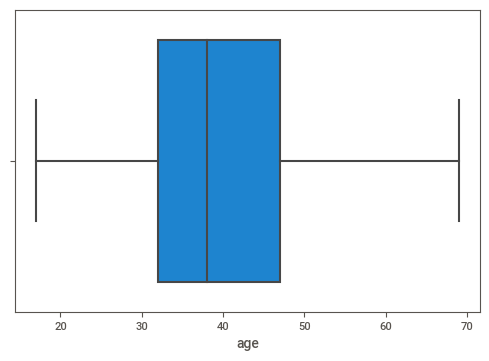

duration :


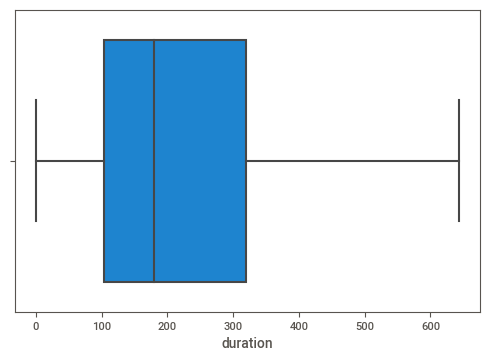

campaign :


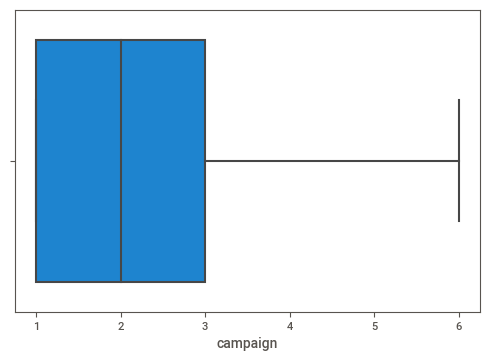

In [16]:
for i in cols:
    print(i,":")
    sns.boxplot(x = i, data = df)
    plt.show()

#### Therefore the problem of outliers has been solved now so we can move ahead.

### c) Handling Duplicate Values:

In [17]:
print(f"There are {df.duplicated().sum()} records in the given dataset.")

There are 14 records in the given dataset.


In [18]:
#dropping duplicates
df.drop_duplicates(inplace = True)
print(f"There are {df.duplicated().sum()} records in the given dataset.")

There are 0 records in the given dataset.


### d) Heatmap and Correlation:

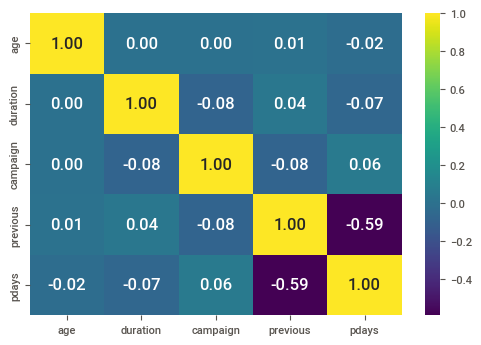

In [19]:
corr = df[['age','duration','campaign','previous','pdays','y']].corr()
sns.heatmap(corr,annot = True,fmt = '0.2f',annot_kws = {'size':12},cmap = 'viridis')
plt.show()

### From above we can see that their is not much of correlation between numerical variables and hence the chances of multicollinearity is very low.

### e) Pairplot and Interpretation:

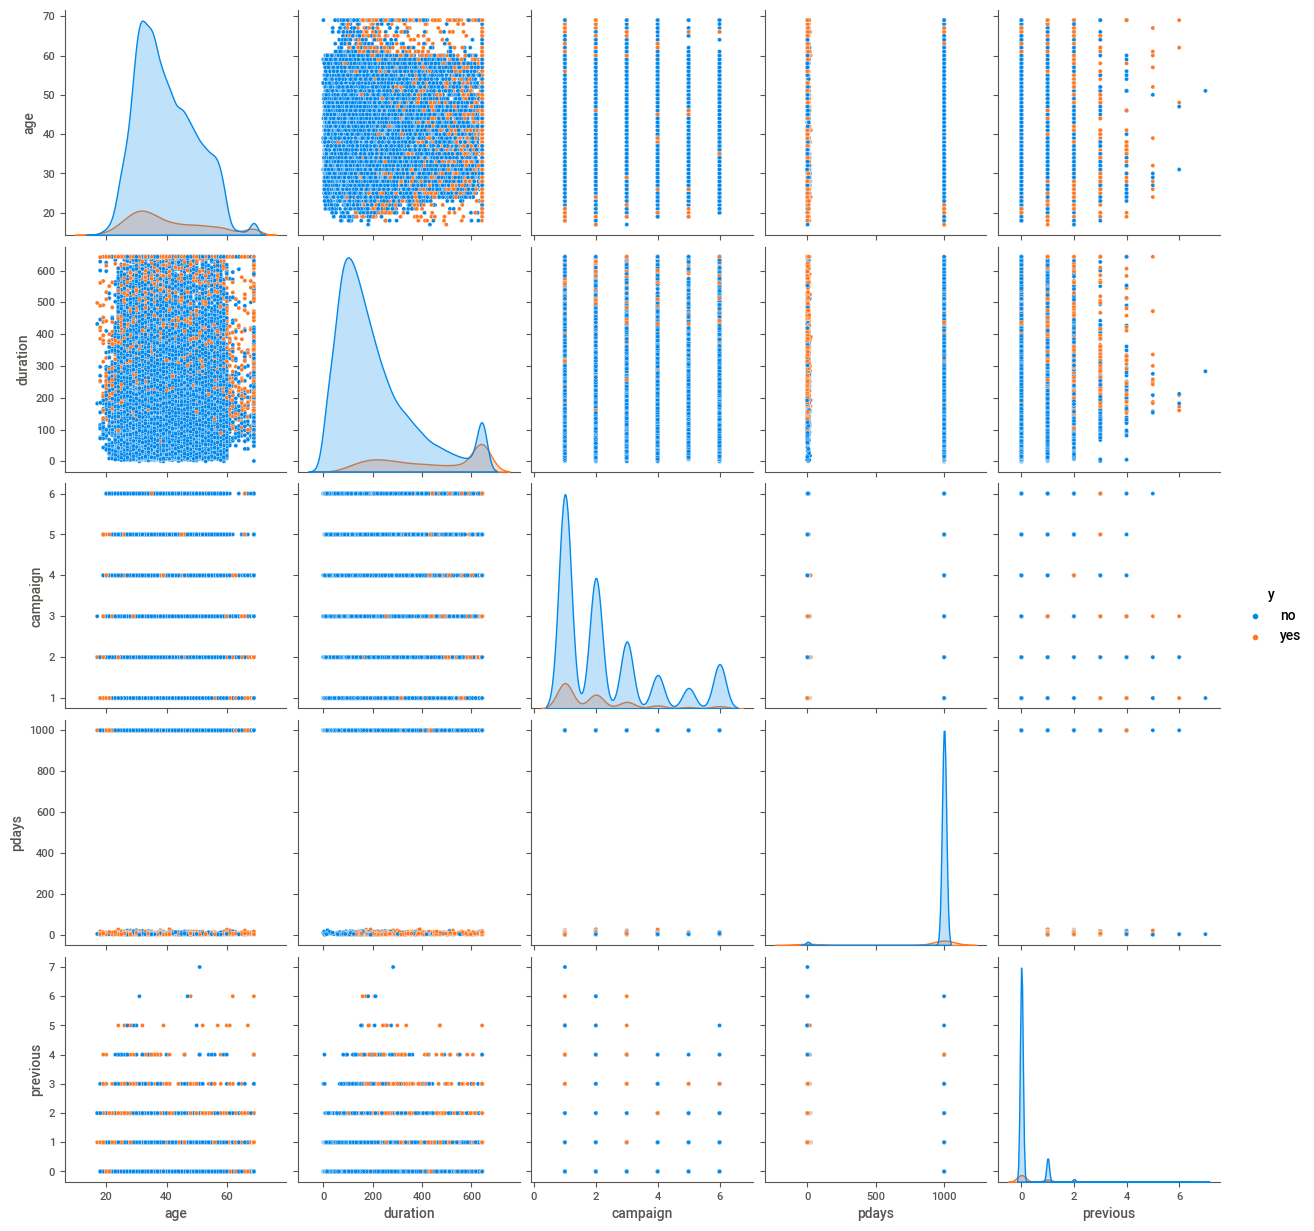

In [20]:
sns.pairplot(df, hue= 'y')
plt.show()

#### From above pairplot we can see that there is not any feature that can help in directly identifying the target class. Anyways we could try to perform PCA based on numerical data and see if that helps.
### Upon further observation we can see that the feature pdays and the feature previous are somewhat helping in identifying the target class.

### f) Feature Engineering:

#### Trying to club numerical features pdays and previous into one column:

In [21]:
pca_data = df[['previous','pdays']]
pca = PCA(n_components = 1)
pca.fit(pca_data)
X_pca = pca.transform(pca_data)
print("Explaiine Variance Ratio: ",pca.explained_variance_ratio_)
print("Preserved Variance Ratio: ",sum(pca.explained_variance_ratio_))

Explaiine Variance Ratio:  [0.9999954]
Preserved Variance Ratio:  0.9999954012920095


### As we can see how the preserved variance ratio is close to 1 which simply means that these features together play a vital role in model building

### Adding new column into dataset:

In [22]:
df['imp1'] = X_pca
# Checking head of data:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,has_loan,imp1
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no,no,-36.963521
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no,no,-36.961955
2,69,retired,married,basic.4y,no,no,no,cellular,jul,mon,643,1,999,0,nonexistent,yes,no,-36.963521
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no,yes,-36.963521
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no,no,-36.963521


### g) Statistical Inference:

We can check the distribution of numerical features of data in statistical inference:

#### 1. Age:

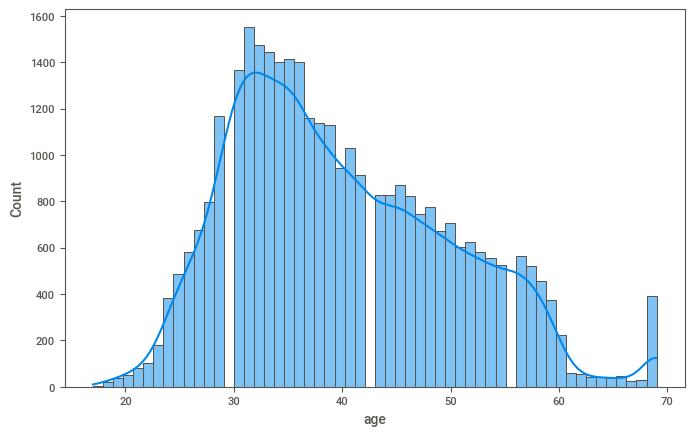

In [23]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'age',data = df,kde=True)
plt.show()

### From above distribution of age feature we can see that the distribution appears to be approximately normal but it is actually positively skewed since the tail is longer towards the right side of the plot.

#### 2. duration:

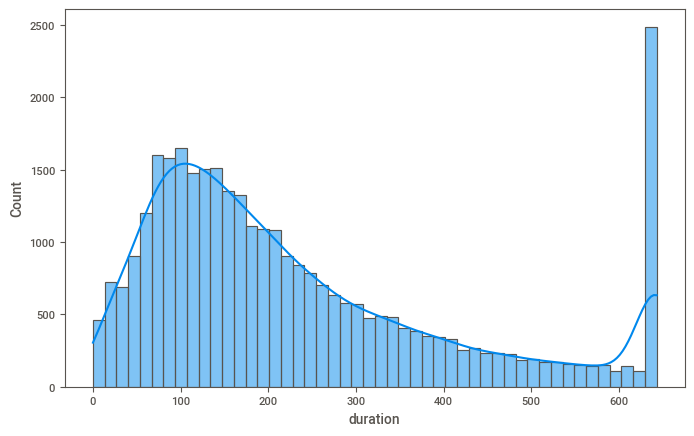

In [24]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'duration',data = df,kde=True)
plt.show()

### From above distribution of duration feature, we can see that the distribution is positively skewed since the tail is longer to the right side of the plot.

#### 3. campaign

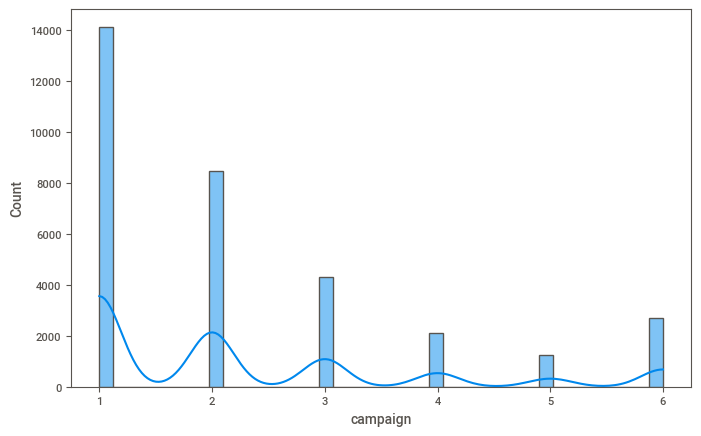

In [25]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'campaign',data = df,kde=True)
plt.show()

### The feature campaign is also postively skewed and has more variable data as compared to other variables.

#### 4. pdays:

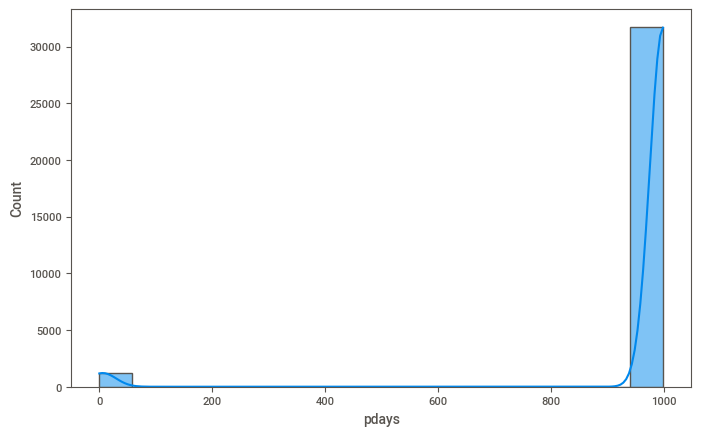

In [26]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'pdays',data = df,kde=True)
plt.show()

### The distribution for pdays is not actually a distribution but can be regarded as negatively skewed since some data is present in the left side of the plot.

## Statistical Summary:

In [27]:
df.describe()

,age,duration,campaign,pdays,previous,imp1
count,32936.000000,32936.000000,32936.000000,32936.000000,32936.000000,3.293600e+04
mean,39.930077,234.876093,2.271375,962.036708,0.174794,5.152772e-14
std,10.118271,176.792483,1.546432,187.989495,0.499118,1.879897e+02
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.696352e+01
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-3.696352e+01
50%,38.000000,180.000000,2.000000,999.000000,0.000000,-3.696352e+01
75%,47.000000,319.000000,3.000000,999.000000,0.000000,-3.696352e+01
max,69.000000,643.000000,6.000000,999.000000,7.000000,9.620431e+02


# 7.  Categorical Feature and Numerical Feature:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32936 entries, 0 to 32949
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          32936 non-null  int64  
 1   job          32936 non-null  object 
 2   marital      32936 non-null  object 
 3   education    32936 non-null  object 
 4   default      32936 non-null  object 
 5   housing      32936 non-null  object 
 6   loan         32936 non-null  object 
 7   contact      32936 non-null  object 
 8   month        32936 non-null  object 
 9   day_of_week  32936 non-null  object 
 10  duration     32936 non-null  int64  
 11  campaign     32936 non-null  int64  
 12  pdays        32936 non-null  int64  
 13  previous     32936 non-null  int64  
 14  poutcome     32936 non-null  object 
 15  y            32936 non-null  object 
 16  has_loan     32936 non-null  object 
 17  imp1         32936 non-null  float64
dtypes: float64(1), int64(5), object(12)
memory usa

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,has_loan,imp1
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no,no,-36.963521
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no,no,-36.961955
2,69,retired,married,basic.4y,no,no,no,cellular,jul,mon,643,1,999,0,nonexistent,yes,no,-36.963521
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no,yes,-36.963521
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no,no,-36.963521


## From both of the results above we can see that there are numerical as well as categorical features present in our dataset. They are as follows:

### 1. Categorical: job, marital, education,default, housing, loan, contact, month, day_of_week, poutcome, y
### 2. Numerical  : age, duration, campaign, pdays, previous, imp1

# 8. Encoding:

In [30]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [31]:
obj_col = ['job','marital','education','default','housing','loan','poutcome']
df2 = pd.get_dummies(data = df,columns = obj_col,drop_first = True)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32936 entries, 0 to 32949
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32936 non-null  int64  
 1   contact                        32936 non-null  object 
 2   month                          32936 non-null  object 
 3   day_of_week                    32936 non-null  object 
 4   duration                       32936 non-null  int64  
 5   campaign                       32936 non-null  int64  
 6   pdays                          32936 non-null  int64  
 7   previous                       32936 non-null  int64  
 8   y                              32936 non-null  int32  
 9   has_loan                       32936 non-null  object 
 10  imp1                           32936 non-null  float64
 11  job_blue-collar                32936 non-null  uint8  
 12  job_entrepreneur               32936 non-null 

Most of the features have been encoded succesfully. Few are not encoded purposely beacause we will be dropping those columns in the future.

### Dropping Redundant Columns

In [33]:
df_final = df2.drop(['contact','month','day_of_week','pdays','has_loan'],axis = 1)

# 9. Normalization:

In [34]:
sc = MinMaxScaler()
for col in df_final.columns.values:
    df_final[col] = sc.fit_transform(df_final[col].values.reshape(-1,1))

### The data has been normalized now.

# 10. Cleaned Data:

In [35]:
df_final.head()

,age,duration,campaign,previous,y,imp1,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,0.615385,0.353033,0.6,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.384615,0.314152,0.2,0.142857,0.0,0.000002,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,1.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.365385,0.186625,0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.807692,0.572317,0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 11. Data Spitting:

In [36]:
X = df_final.drop('y',axis = 1)
y = df_final['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 12. Feature Importance:

Feature importance can be found out using Random Forest:

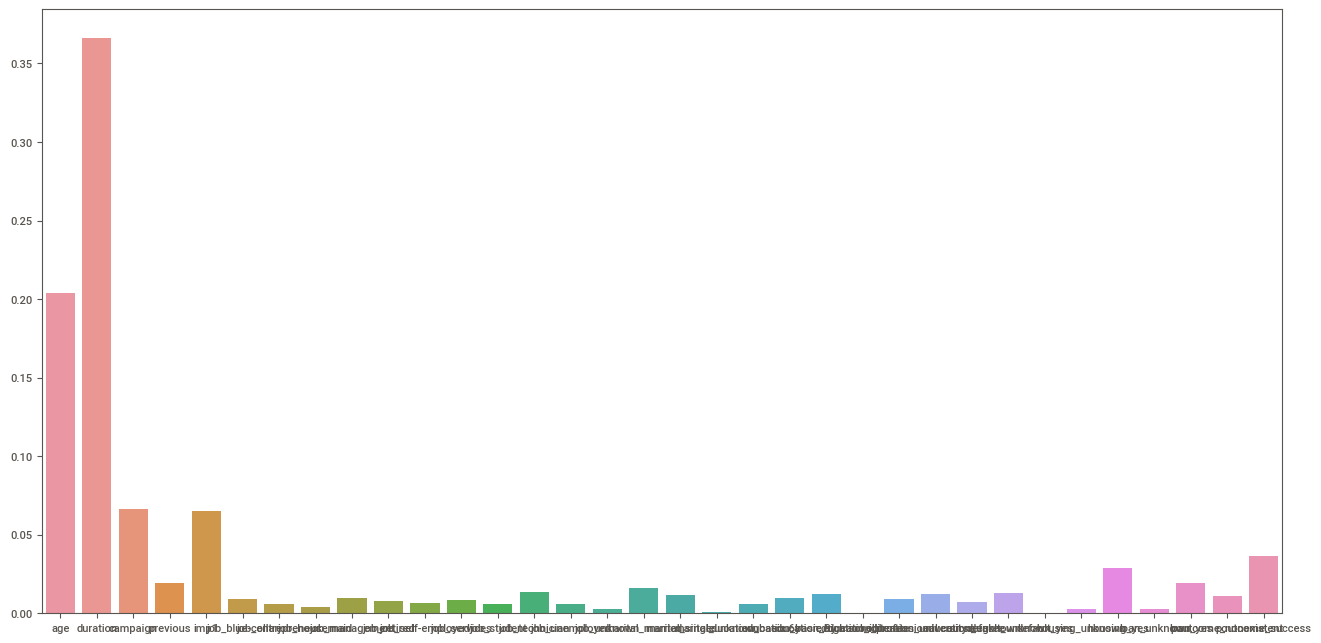

Importance of Each variable is as follows: 
age :  0.2039036210480457
duration :  0.3661626819913062
campaign :  0.06635401409118316
previous :  0.018968631478885625
imp1 :  0.06531367347994887
job_blue-collar :  0.009131555710246798
job_entrepreneur :  0.005670424424621065
job_housemaid :  0.0042440199677864915
job_management :  0.009851474517539534
job_retired :  0.007781713157951666
job_self-employed :  0.0064310589145254475
job_services :  0.008332133455971415
job_student :  0.006109533058445995
job_technician :  0.013400510019982678
job_unemployed :  0.005843615587075561
job_unknown :  0.0027574631139392477
marital_married :  0.015803702887396902
marital_single :  0.011598227495908784
marital_unknown :  0.0008794797208460386
education_basic.6y :  0.005664382500920138
education_basic.9y :  0.009955329765952524
education_high.school :  0.012355418930749608
education_illiterate :  0.0003233138319474911
education_professional.course :  0.009348997333538092
education_university.degree 

In [37]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Print the feature importance scores
col = X.columns.values
imp = clf.feature_importances_
plt.figure(figsize = (16,8))
sns.barplot(x = col, y = imp)
plt.show()
print("Importance of Each variable is as follows: ")
for c, im in zip(col, imp):
    print(c,": ",im)

### ---------------------------------------------------------------Data Is Clean--------------------------------------------------------------------------

# 13. ML Models and Evaluation Metrics:

## 1. Decision Tree

In [38]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt_pred1 = dt.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,dt_pred1))
print('******************************************************************************')
print('Accuracy of Decision Tree Model is: ',round(accuracy_score(y_test,dt_pred1)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,dt_pred1))

Confusion Matix: 
[[8050  746]
 [ 684  401]]
******************************************************************************
Accuracy of Decision Tree Model is:  85.53
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      8796
         1.0       0.35      0.37      0.36      1085

    accuracy                           0.86      9881
   macro avg       0.64      0.64      0.64      9881
weighted avg       0.86      0.86      0.86      9881



## From above classification report of Decision Tree we can see that we get 86% overall accuracy and since our data is related to Banking Domain, we would focus more on recall values. Upon observing, we can see that for category 0 we get recall value of 0.92 which is good but in case of category 1 we get 0.37 which should be improved since False Negatives should be avoided as much as possible.

## 2. Random Forest:

In [39]:
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train,y_train)
rf_pred1 = rf.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,rf_pred1))
print('******************************************************************************')
print('Accuracy of Random Forest Model is: ',round(accuracy_score(y_test,rf_pred1)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,rf_pred1))

Confusion Matix: 
[[8510  286]
 [ 718  367]]
******************************************************************************
Accuracy of Random Forest Model is:  89.84
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      8796
         1.0       0.56      0.34      0.42      1085

    accuracy                           0.90      9881
   macro avg       0.74      0.65      0.68      9881
weighted avg       0.88      0.90      0.89      9881



## As we can see from above classification report, for Random Forest we get overall accuracy of 90% and in case of recall for category 0 we get 0.97 which is really good and in case of category 1 we get 0.34 which needs to be improved.

## 3. Naive Bayes:

In [40]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred1 = nb.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,nb_pred1))
print('******************************************************************************')
print('Accuracy of Gaussian Naive Bayes Model is: ',round(accuracy_score(y_test,nb_pred1)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,nb_pred1))

Confusion Matix: 
[[6644 2152]
 [ 312  773]]
******************************************************************************
Accuracy of Gaussian Naive Bayes Model is:  75.06
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.76      0.84      8796
         1.0       0.26      0.71      0.39      1085

    accuracy                           0.75      9881
   macro avg       0.61      0.73      0.61      9881
weighted avg       0.88      0.75      0.79      9881



## From above classification report we get overall accuracy of 75% and in case of recall values we get 0.76 and 0.71 respectively for category 0 and 1. The recall values are accpetable but the accuracy is very low so we may need to fine tune it and then decide whether to select GaussianNB or not.

## 4. Support Vector Machine(SVM):

In [41]:
svm1 = SVC()
svm1.fit(X_train,y_train)
svm_pred1 = svm1.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,svm_pred1))
print('******************************************************************************')
print('Accuracy of Support Vector Machine Model is: ',round(accuracy_score(y_test,svm_pred1)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,svm_pred1))

Confusion Matix: 
[[8685  111]
 [ 880  205]]
******************************************************************************
Accuracy of Support Vector Machine Model is:  89.97
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      8796
         1.0       0.65      0.19      0.29      1085

    accuracy                           0.90      9881
   macro avg       0.78      0.59      0.62      9881
weighted avg       0.88      0.90      0.87      9881



## From above report we can see the overall accuracy for SVM is 90% and the recall values for categories 0 and 1 is 0.99 and 0.19 repsectively which needs improvements.

# 14. Fine Tuning:

## 1. Decision Tree:

In [42]:
model = DecisionTreeClassifier(random_state=42)
params = {'max_depth':[2,3,4,5,6,7,8,10,12], 'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3,4,6,8,10],'min_samples_split':[2,4,6]}
search = GridSearchCV(model, params, n_jobs = -1,scoring = 'accuracy')
res = search.fit(X_train, y_train)
print(res.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)


In [43]:
best_dt = res.best_estimator_
best_dt.fit(X_train,y_train)
dt_pred2 = best_dt.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,dt_pred2))
print('******************************************************************************')
print('Accuracy of Decision Tree Model after Fine tuning is: ',round(accuracy_score(y_test,dt_pred2)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,dt_pred2))

Confusion Matix: 
[[8730   66]
 [ 895  190]]
******************************************************************************
Accuracy of Decision Tree Model after Fine tuning is:  90.27
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      8796
         1.0       0.74      0.18      0.28      1085

    accuracy                           0.90      9881
   macro avg       0.82      0.58      0.62      9881
weighted avg       0.89      0.90      0.87      9881



## From above classification report of fine tuned Decision Tree we can see that the overall accuracy of the model increased from 85% to 90% but the problem of low recall still exists in case of category 1. So we have to deal with it either by oversampling or undersampling.

## Recalibration:

### 1. Oversampling:

In [44]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())
dt1 = res.best_estimator_
dt1.fit(X_train_res,y_train_res.ravel())
dt_pred3 = dt1.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,dt_pred3))
print('******************************************************************************')
print('Accuracy of Decision Tree Model after fine tuning and oversampled data is: ',round(accuracy_score(y_test,dt_pred3)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,dt_pred3))

Confusion Matix: 
[[7942  854]
 [ 416  669]]
******************************************************************************
Accuracy of Decision Tree Model after fine tuning and oversampled data is:  87.15
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      8796
         1.0       0.44      0.62      0.51      1085

    accuracy                           0.87      9881
   macro avg       0.69      0.76      0.72      9881
weighted avg       0.89      0.87      0.88      9881



### From above report, we can see our overall accuracy is slightly reduced but the recall values have improved significantly. As a result oversampling actually helped us in decreasing the number of False Negatives and increasing the recall values.

### 2. Undersampling:

In [45]:
nm = NearMiss()
X_train_nm,y_train_nm = nm.fit_resample(X_train,y_train.ravel())
dt2 = res.best_estimator_
dt2.fit(X_train_nm,y_train_nm.ravel())
dt_pred4 = dt2.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,dt_pred4))
print('******************************************************************************')
print('Accuracy of Decision Tree Model after fine tuning and undersampled data is: ',round(accuracy_score(y_test,dt_pred4)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,dt_pred4))

Confusion Matix: 
[[6977 1819]
 [ 232  853]]
******************************************************************************
Accuracy of Decision Tree Model after fine tuning and undersampled data is:  79.24
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      8796
         1.0       0.32      0.79      0.45      1085

    accuracy                           0.79      9881
   macro avg       0.64      0.79      0.66      9881
weighted avg       0.90      0.79      0.83      9881



## From above result, the overall accuracy of Undersampled and Fine Tuned decision tree came out to be 79% and just satisfactory recall values of 0.79 and 0.79. We get all the three parameters in better way by using the oversampled data.
## As a result, the oversamplig strategy with fine tuned parameters for Decision Tree actually helped in improvement of performance of Decision Tree Classifier.

## As a result, in case of Decision Tree, if we are to go with high recall and acceptable accuracy, we should select the oversampling strategy since it gives 0.79 and 0.75 recall for no and yes respectively and has accuracy of around 79% which is still acceptable.

## 2. Random Forest

In [46]:
params = {'n_estimators':[10,20,50,100,110,120,140,150,170,200,260],
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8,9],
    'min_samples_split':[2,3,4,5,6]
}
clf = RandomizedSearchCV(rf,params,random_state=101,n_jobs=-1,scoring='roc_auc',verbose=5,cv=5)
search = clf.fit(X_train,y_train)
print(search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 50, 'min_samples_split': 4, 'max_depth': 9, 'criterion': 'entropy'}


Fitting Random forest with best parameters

In [48]:
best_rf = search.best_estimator_
best_rf.fit(X_train,y_train)
rf_pred2 = best_rf.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,rf_pred2))
print('******************************************************************************')
print('Accuracy of Random Forest Model after fine tuning is: ',round(accuracy_score(y_test,rf_pred2)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,rf_pred2))

Confusion Matix: 
[[8727   69]
 [ 887  198]]
******************************************************************************
Accuracy of Random Forest Model after fine tuning is:  90.32
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      8796
         1.0       0.74      0.18      0.29      1085

    accuracy                           0.90      9881
   macro avg       0.82      0.59      0.62      9881
weighted avg       0.89      0.90      0.88      9881



## As from above classification report of fine tuned Random Forest Model, we can see that we got overall accuracy of 90% which is same as not fine tuned Random Forest but here the recall for category 0 increased but for category 1 the recall value decreased slightly.
## We need to fix this by using either Oversampling(SMOTE) or Undersampling(NearMiss)

## Recalibration:

### 1. Oversampling:

In [49]:
best_rf.fit(X_train_res,y_train_res)
rf_pred3 = best_rf.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,rf_pred3))
print('******************************************************************************')
print('Accuracy of Random Forest Model after fine tuning and oversampled data is: ',round(accuracy_score(y_test,rf_pred3)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,rf_pred3))

Confusion Matix: 
[[7315 1481]
 [ 248  837]]
******************************************************************************
Accuracy of Random Forest Model after fine tuning and oversampled data is:  82.5
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89      8796
         1.0       0.36      0.77      0.49      1085

    accuracy                           0.83      9881
   macro avg       0.66      0.80      0.69      9881
weighted avg       0.90      0.83      0.85      9881



## After applying SMOTE function to fine tuned random forest, we get overall accuracy of 83% and the recall values are 0.83 and 0.77 for category 0 and 1 respectively which is really good improvement as compared to earlier models trained using Random Forest.

### 2. Undersampling:

In [50]:
best_rf.fit(X_train_nm,y_train_nm)
rf_pred4 = best_rf.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,rf_pred4))
print('******************************************************************************')
print('Accuracy of Random Forest Model after fine tuning and undersampled data is: ',round(accuracy_score(y_test,rf_pred4)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,rf_pred4))

Confusion Matix: 
[[4048 4748]
 [ 247  838]]
******************************************************************************
Accuracy of Random Forest Model after fine tuning and undersampled data is:  49.45
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.94      0.46      0.62      8796
         1.0       0.15      0.77      0.25      1085

    accuracy                           0.49      9881
   macro avg       0.55      0.62      0.43      9881
weighted avg       0.86      0.49      0.58      9881



## The above classification report clearly specifies that the undersampling(NearMiss) strategy is not good for Random Forest in our case since the overall accuracy is 49% and the recall values for category 0 is not satisfactory.

## As a result, in case of Random Forest, if we are to go with high recall and acceptable accuracy, we should select the oversampling(SMOTE) strategy since it gives 77% and 83% recall for no and yes respectively and has accuracy of around 83% which is still acceptable.

## 3. GaussianNB:

In [51]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

grid_search = GridSearchCV(nb, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print('Confusion Matix: ')
print(confusion_matrix(y_test,y_pred))
print('******************************************************************************')
print('Accuracy of Gaussian Naive Bayes Model after fine tuning is: ',round(accuracy_score(y_test,y_pred)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Confusion Matix: 
[[7875  921]
 [ 654  431]]
******************************************************************************
Accuracy of Gaussian Naive Bayes Model after fine tuning is:  84.06
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      8796
         1.0       0.32      0.40      0.35      1085

    accuracy                           0.84      9881
   macro avg       0.62      0.65      0.63      9881
weighted avg       0.86      0.84      0.85      9881



## The classification report of GaussianNB after fine tuning resulted in improved overall accuracy of 84% and recall values for category 0 is 0.90 which is really good but in case of category 1 we do not get up to the mark score. So we need to solve this issue.

## Recalibration:

### 1. Oversampling:

In [52]:
best_model.fit(X_train_res,y_train_res)
nb1_pred = best_model.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,nb1_pred))
print('******************************************************************************')
print('Accuracy of Gaussian Naive Bayes Model after fine tuning and oversampled data is: ',round(accuracy_score(y_test,nb1_pred)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,nb1_pred))

Confusion Matix: 
[[7159 1637]
 [ 414  671]]
******************************************************************************
Accuracy of Gaussian Naive Bayes Model after fine tuning and oversampled data is:  79.24
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87      8796
         1.0       0.29      0.62      0.40      1085

    accuracy                           0.79      9881
   macro avg       0.62      0.72      0.64      9881
weighted avg       0.87      0.79      0.82      9881



## From the classification report of Fine Tuned and Oversampled Gaussian Naive Bayes we got overall accuracy of 79% which is really acceptable and the recall values were between 0.81 and 0.62 which are just above average.

### 2. Undersampling:

In [53]:
best_model.fit(X_train_nm,y_train_nm)
nb2_pred = best_model.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,nb2_pred))
print('******************************************************************************')
print('Accuracy of Gaussian Naive Bayes Model after fine tuning and undersampled data is: ',round(accuracy_score(y_test,nb2_pred)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,nb2_pred))

Confusion Matix: 
[[5773 3023]
 [ 577  508]]
******************************************************************************
Accuracy of Gaussian Naive Bayes Model after fine tuning and undersampled data is:  63.57
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      0.66      0.76      8796
         1.0       0.14      0.47      0.22      1085

    accuracy                           0.64      9881
   macro avg       0.53      0.56      0.49      9881
weighted avg       0.83      0.64      0.70      9881



## The classification report for Fine Tuned GaussianNB with Undersampling(NearMiss) startegy resulted in overall 64% accuracy and in case of recall values, it reported 0.66 and 0.47 repectively for category 0 and 1.
## From all the results of GaussianNB we could clearly conclude GaussianNB is not at all good fit for our dataset.

## 4. SVM:

In [54]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm1, param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   4.8s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   4.8s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   4.8s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   4.8s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   5.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  13.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  11.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  15.9s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   7.1s
[CV] END ....................C=0.1, gamma=0.1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [55]:
print("Best Estimators: ",grid.best_estimator_)
best_svm = grid.best_estimator_
svm_pred2 = best_svm.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,svm_pred2))
print('******************************************************************************')
print('Accuracy of SVM Model after fine tuning is: ',round(accuracy_score(y_test,svm_pred2)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,svm_pred2))

Best Estimators:  SVC(C=10, gamma=0.1)
Confusion Matix: 
[[8704   92]
 [ 884  201]]
******************************************************************************
Accuracy of SVM Model after fine tuning is:  90.12
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      8796
         1.0       0.69      0.19      0.29      1085

    accuracy                           0.90      9881
   macro avg       0.80      0.59      0.62      9881
weighted avg       0.88      0.90      0.87      9881



## From above classsification report of Fine Tuned SVM model we can see we get overall accuracy of 90% and the recall values for category 0 is 0.99 which is really good and in case of category 1 we get 0.19 which needs to be improved.

## Recalibration:

### 1. Oversampling:

In [56]:
best_svm.fit(X_train_res,y_train_res)
svm_pred3 = best_svm.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,svm_pred3))
print('******************************************************************************')
print('Accuracy of SVM Model after fine tuning and oversampled data is: ',round(accuracy_score(y_test,svm_pred3)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,svm_pred3))

Confusion Matix: 
[[7326 1470]
 [ 291  794]]
******************************************************************************
Accuracy of SVM Model after fine tuning and oversampled data is:  82.18
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      8796
         1.0       0.35      0.73      0.47      1085

    accuracy                           0.82      9881
   macro avg       0.66      0.78      0.68      9881
weighted avg       0.89      0.82      0.85      9881



## The above classification report generates overall accuracy of 82% and the recall values are 0.83 and 0.73 which are fairly acceptable recall values compared to all the other recall values we got.

### 2. Undersampling:


In [57]:
best_svm.fit(X_train_nm,y_train_nm)
svm_pred4 = best_svm.predict(X_test)

print('Confusion Matix: ')
print(confusion_matrix(y_test,svm_pred4))
print('******************************************************************************')
print('Accuracy of SVM Model after fine tuning and oversampled data is: ',round(accuracy_score(y_test,svm_pred4)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,svm_pred4))

Confusion Matix: 
[[2621 6175]
 [ 258  827]]
******************************************************************************
Accuracy of SVM Model after fine tuning and oversampled data is:  34.9
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.91      0.30      0.45      8796
         1.0       0.12      0.76      0.20      1085

    accuracy                           0.35      9881
   macro avg       0.51      0.53      0.33      9881
weighted avg       0.82      0.35      0.42      9881



### From the above report, the overall accuracy came out to be 35% which is really poor and in case of recall values they are inconsistent too. So NearMiss Strategy with SVM is not good idea.

### Therefore in conclusion for SVM, as we can see we get better accuracy and good recall in case of using of oversampling strategy. The accuracy came out to be around 81% and recall was 82% and 76% respectively which is in the acceptable range.

# 15. Cross Validation Scores:

## 1. Decision Tree:

In [58]:
score_res1 = cross_val_score(dt1, X_train_res, y_train_res, cv = 5)
print("All the validation scores: ",score_res1)
print("Average CV score: ",score_res1.mean())

All the validation scores:  [0.77548024 0.76948489 0.77413434 0.77511318 0.76566324]
Average CV score:  0.7719751783492066


## 2. Random Forest:

In [59]:
score_res2 = cross_val_score(best_rf, X_train_res, y_train_res, cv = 5)
print("All the validation scores: ",score_res2)
print("Average CV score: ",score_res2.mean())

All the validation scores:  [0.831029   0.85806925 0.86308577 0.86210694 0.86502692]
Average CV score:  0.8558635758453736


## 3. GaussianNB:

In [60]:
score_res3 = cross_val_score(best_model, X_train_res, y_train_res, cv = 5)
print("All the validation scores: ",score_res3)
print("Average CV score: ",score_res3.mean())

All the validation scores:  [0.72433623 0.7054937  0.72886333 0.73216689 0.71830641]
Average CV score:  0.7218333122822008


## 4. Support Vector Machine(SVM):

In [61]:
score_res4 = cross_val_score(best_svm, X_train_res, y_train_res, cv = 5)
print("All the validation scores: ",score_res4)
print("Average CV score: ",score_res4.mean())

All the validation scores:  [0.83188548 0.86271871 0.86687875 0.86822464 0.87151248]
Average CV score:  0.8602440110725962


## From all the above cross validation scores, the best average cross validation scores came out of Support Vector Machine, and Random Forest Classifier.

# 16. Final Evaluation and Predictions:

## 1. Decision Tree (with best results):

In [62]:
print('Confusion Matix: ')
print(confusion_matrix(y_test,dt_pred3))
print('******************************************************************************')
print('Accuracy of Decision Tree Model after fine tuning and oversampled data is: ',round(accuracy_score(y_test,dt_pred3)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,dt_pred3))
print(dt_pred3)

Confusion Matix: 
[[7942  854]
 [ 416  669]]
******************************************************************************
Accuracy of Decision Tree Model after fine tuning and oversampled data is:  87.15
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      8796
         1.0       0.44      0.62      0.51      1085

    accuracy                           0.87      9881
   macro avg       0.69      0.76      0.72      9881
weighted avg       0.89      0.87      0.88      9881

[0. 0. 0. ... 0. 0. 1.]


## 2. Random Forest (with best results):

In [63]:
print('Confusion Matix: ')
print(confusion_matrix(y_test,rf_pred3))
print('******************************************************************************')
print('Accuracy of Random Forest Model after fine tuning and oversampled data is: ',round(accuracy_score(y_test,rf_pred3)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,rf_pred3))

print(rf_pred3)

Confusion Matix: 
[[7315 1481]
 [ 248  837]]
******************************************************************************
Accuracy of Random Forest Model after fine tuning and oversampled data is:  82.5
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89      8796
         1.0       0.36      0.77      0.49      1085

    accuracy                           0.83      9881
   macro avg       0.66      0.80      0.69      9881
weighted avg       0.90      0.83      0.85      9881

[1. 0. 0. ... 0. 0. 1.]


## 3. GaussianNB (with best results):

In [64]:
print('Confusion Matix: ')
print(confusion_matrix(y_test,y_pred))
print('******************************************************************************')
print('Accuracy of Gaussian Naive Bayes Model after fine tuning is: ',round(accuracy_score(y_test,y_pred)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,y_pred))

print(y_pred)

Confusion Matix: 
[[7875  921]
 [ 654  431]]
******************************************************************************
Accuracy of Gaussian Naive Bayes Model after fine tuning is:  84.06
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      8796
         1.0       0.32      0.40      0.35      1085

    accuracy                           0.84      9881
   macro avg       0.62      0.65      0.63      9881
weighted avg       0.86      0.84      0.85      9881

[0. 0. 0. ... 0. 0. 0.]


## 4. SVM (with best results):

In [65]:
print('Confusion Matix: ')
print(confusion_matrix(y_test,svm_pred3))
print('******************************************************************************')
print('Accuracy of SVM Model after fine tuning and oversampled data is: ',round(accuracy_score(y_test,svm_pred3)*100,2))
print('******************************************************************************')
print('Classification Report: ')
print(classification_report(y_test,svm_pred3))

print(svm_pred3)

Confusion Matix: 
[[7326 1470]
 [ 291  794]]
******************************************************************************
Accuracy of SVM Model after fine tuning and oversampled data is:  82.18
******************************************************************************
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      8796
         1.0       0.35      0.73      0.47      1085

    accuracy                           0.82      9881
   macro avg       0.66      0.78      0.68      9881
weighted avg       0.89      0.82      0.85      9881

[0. 0. 1. ... 0. 0. 1.]


# 17. ML Analytics and Conclusions:

## When we compare all the algorithms based on our Banking Dataset in which we are predicting whether a customer will make a term deposit or not, one thing that was noticed that all the models performed significantly well when we use Oversampling(SMOTE) strategy after the model was Fine Tuned.

## Based on Above Statement the Top 3 algorithms that performed really well with really satisfactory and acceptable Recall values are as follows with their corresponding results:
### 1. Random Forest (Fine Tuned and Oversampled(SMOTE)):- Overall Accuracy = 83%, Recall Values: (0.83,0.77) repectively for category (0,1).
### 2. SVM (Fine Tuned and Oversampled(SMOTE)):- Overall Accuracy = 82%, Recall Values: (0.83, 0.73) respectively for category (0,1).
### 3. Decision Tree (Fine Tuned and Oversampled(SMOTE)):- Overall Accuracy = 87%, Recall Values: (0.90,0.62) respectively for category (0,1).

## Based on above results the best algorithm for our dataset would be Random Forest with Fine Tuned and Oversampled(SMOTE) strategy since its recall values are really accpetable and the accuracy is also good.

## The reason why Decision Tree is not considered as the first algoirthm here though it has highest accuracy is because of the recall value of category 1 which is coming 0.62 which is fairly less as compared to other algorithms.

## The main reason, why I am focusing more on Recall score is because since we have Banking related dataset, we have to reduce the false negatives as much as possible or else the effects could be bad on the bank.
## Since there might be cases where bank spends on promoting their schemes to wrong customers that won't help bank in any way and in turn exhaust their resources and money.

## Also, SVM is capable of handling high dimensional data really well and automatically tries to deal with the problem of overfitting in its own way.
## Due to these reasons, SVM is also the algorithm that would be best fit in our case.

## As a result, Fine Tuned Random Forest and Fine Tuned Support Vector Machine both with oversampling Strategy are the best fit for our case study.

# 18. Difficulties Faced in Project:
### One of the biggest difficulty that occured in the project is when we restart the kernel and re-run the notebook, there are slight chances in accuracy of few model which changes postively or negatively.

# -------------------------------------------------THE END----------------------------------------------
